In [1]:
import pandas as pd
import datetime
from sklearn.utils import shuffle
#import matplotlib.pyplot as plt

## preprocess

In [2]:
df_flot_raw = pd.read_csv('./data/Flotation_Plant_preprocessed.csv')
df_flot_raw['date'] = pd.to_datetime(df_flot_raw['date'])
df_flot_raw['datetime'] = pd.to_datetime(df_flot_raw['datetime'])

In [3]:
df_flot_raw.shape

(737460, 25)

In [74]:
df_flot_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737460 entries, 0 to 737459
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          737460 non-null  datetime64[ns]
 1   % Iron Feed                   737460 non-null  float64       
 2   % Silica Feed                 737460 non-null  float64       
 3   Starch Flow                   737460 non-null  float64       
 4   Amina Flow                    737460 non-null  float64       
 5   Ore Pulp Flow                 737460 non-null  float64       
 6   Ore Pulp pH                   737460 non-null  float64       
 7   Ore Pulp Density              737460 non-null  float64       
 8   Flotation Column 01 Air Flow  737460 non-null  float64       
 9   Flotation Column 02 Air Flow  737460 non-null  float64       
 10  Flotation Column 03 Air Flow  737460 non-null  float64       
 11  Flotation Col

In [4]:
df_first = df_flot_raw.drop_duplicates(subset=['date'], keep='first')

### scaling

In [9]:
columns = df_first.columns

In [10]:
columns

Index(['date', '% Iron Feed', '% Silica Feed', 'Starch Flow', 'Amina Flow',
       'Ore Pulp Flow', 'Ore Pulp pH', 'Ore Pulp Density',
       'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow',
       'Flotation Column 03 Air Flow', 'Flotation Column 04 Air Flow',
       'Flotation Column 05 Air Flow', 'Flotation Column 06 Air Flow',
       'Flotation Column 07 Air Flow', 'Flotation Column 01 Level',
       'Flotation Column 02 Level', 'Flotation Column 03 Level',
       'Flotation Column 04 Level', 'Flotation Column 05 Level',
       'Flotation Column 06 Level', 'Flotation Column 07 Level',
       '% Iron Concentrate', '% Silica Concentrate', 'datetime',
       '% Silica Concentrate_a1hr'],
      dtype='object')

In [11]:
for i in range(2,7):
    for col in columns:
        if col not in ['date', 'datetime', '% Iron Concentrate','% Silica Concentrate_a1hr']: #'% Silica Concentrate'
            df_first[col + '_'+str(i)] = df_first[col].rolling(i, min_periods=1).mean()

C:\Users\Ling\AppData\Local\Temp\ipykernel_17556\2950294948.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first[col + '_'+str(i)] = df_first[col].rolling(i, min_periods=1).mean()
C:\Users\Ling\AppData\Local\Temp\ipykernel_17556\2950294948.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first[col + '_'+str(i)] = df_first[col].rolling(i, min_periods=1).mean()
C:\Users\Ling\AppData\Local\Temp\ipykernel_17556\2950294948.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [15]:
TIMEZONES = {
    'train':{
        'start': datetime.datetime(2017,3,29,12,0,0),
        'end': datetime.datetime(2017,7,23,3,0,0)
    },
    'valid':{
        'start': datetime.datetime(2017,7,23,3,0,0),
        'end': datetime.datetime(2017,9,9,23,0,0)}
    }

In [12]:
min_max_dict = {}
for col in df_first.columns:
    if col not in ['date', 'datetime', '% Silica Concentrate_a1hr','% Iron Concentrate']:
        min_max_dict[col] = [df_first[col].min(), df_first[col].max()]

In [13]:
# train scale
df_first_scale = pd.DataFrame()
for col in df_first.columns:
    if col not in ['date', 'datetime', '% Silica Concentrate_a1hr','% Iron Concentrate']:
        df_first_scale[col] = (df_first[col] - min_max_dict[col][0])/(min_max_dict[col][1]-min_max_dict[col][0])
    else:
        df_first_scale[col] = df_first[col]

C:\Users\Ling\AppData\Local\Temp\ipykernel_17556\3325430910.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_first_scale[col] = (df_first[col] - min_max_dict[col][0])/(min_max_dict[col][1]-min_max_dict[col][0])
C:\Users\Ling\AppData\Local\Temp\ipykernel_17556\3325430910.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_first_scale[col] = (df_first[col] - min_max_dict[col][0])/(min_max_dict[col][1]-min_max_dict[col][0])
C:\Users\Ling\AppData\Local\Temp\ipykernel_17556\3325430910.py:5: PerformanceWarning: DataFrame is h

In [16]:
df_valid = df_first_scale[(df_first_scale['date']>TIMEZONES['valid']['start'])]

In [17]:
df_train = df_first_scale[df_first_scale['date']<=TIMEZONES['train']['end']]

In [18]:
df_train.shape

(2925, 136)

In [13]:
df_train.to_csv('./data/train.csv', index=False)

In [14]:
df_valid.to_csv('./data/test.csv', index=False)

## modeling
* nn

In [20]:
df_train = shuffle(df_train, random_state=0)

In [22]:
X_train, Y_train = df_train[[u for u in df_train.columns if u not in ['date', 'datetime', '% Iron Concentrate', '% Silica Concentrate_a1hr']]],  df_train[['% Silica Concentrate_a1hr']]
X_valid, Y_valid = df_valid[[u for u in df_valid.columns if u not in ['date', 'datetime', '% Iron Concentrate', '% Silica Concentrate_a1hr']]],  df_valid['% Silica Concentrate_a1hr']

In [2]:
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras import layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import backend as K
from sklearn.model_selection import KFold
import numpy as np
from tensorflow.keras.regularizers import l2

In [3]:
def get_kfold_num(df):
    kf = KFold(n_splits=10)
    df = shuffle(df)
    n_folds = [[train_idx, valid_idx]
           for train_idx, valid_idx in kf.split(df)
           ]

    n_fold = pd.Series(np.empty(df.shape[0]), dtype=int)
    for i, idx in enumerate(n_folds):
        n_fold[idx[1]] = i
    df = df.reset_index(drop=True)
    df = pd.concat([df, n_fold.rename('N_Fold')], axis=1)
    return df

In [49]:
def get_fold_valid_acc(df, model, bs = 30, tuning = True, x_test_np = []):
    mse_list = []
    mae_list = []
    result = []
    for fold in range(10):
        df_x_valid, df_y_valid = df[df['N_Fold']==fold][[u for u in df_train.columns if u not in ['date', 'datetime', '% Iron Concentrate', '% Silica Concentrate', 'N_Fold']]], \
            df[df['N_Fold']==fold][['% Silica Concentrate']]
        df_x_train, df_y_train = df[df['N_Fold']!=fold][[u for u in df_train.columns if u not in ['date', 'datetime', '% Iron Concentrate', '% Silica Concentrate', 'N_Fold']]], \
            df[df['N_Fold']!=fold][['% Silica Concentrate']]
        y_train_np = df_y_train.to_numpy()
        x_train_np = df_x_train.to_numpy()
        y_valid_np = df_y_valid.to_numpy()
        x_valid_np = df_x_valid.to_numpy()
        data_fit = model.fit(x_train_np, y_train_np, batch_size=bs, epochs=100, verbose=0)
        mse, mae = model.evaluate(x_valid_np, y_valid_np, verbose=1)
        mse_list.append(mse)
        mae_list.append(mae)
        if tuning==False:
            score = model.predict(x_test_np)
            score = score.reshape(x_test_np.shape[0],)
            result.append(score)
    if tuning==False:
        return result
    else:
        return round(sum(mse_list)/len(mse_list), 5), round(sum(mae_list)/len(mae_list), 5)

In [5]:
df_train = pd.read_csv('./data/train.csv')
df_valid = pd.read_csv('./data/test.csv')

In [6]:
df_train = shuffle(df_train, random_state=0)

In [7]:
df_train_fold = get_kfold_num(df_train)

In [69]:
batch_size = np.arange(20,150,10)
best_bs = 0
best_mse = 100
best_mae = 100
for bs in batch_size:
    model = Sequential()
    model.add(Dense(64, input_dim=126, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64 , activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64 , activation='relu'))
    model.add(Dense(1))
    model.compile(loss="mse", optimizer=Adam(learning_rate=0.00021544346900318845), metrics=["mae"])
    curr_mse, curr_mae = get_fold_valid_acc(df_train_fold, model, bs)
    if curr_mse <= best_mse:
        best_mse = curr_mse
        best_mae = curr_mae
        best_bs = bs
    print("best bs: " + str(best_bs))
    print("Result mse: " + str(best_mse))

10/10 [==============================] - 0s 2ms/step - loss: 0.5876 - mae: 0.5932
best bs: 20
Result mse: 0.73997
10/10 [==============================] - 0s 2ms/step - loss: 0.5767 - mae: 0.5826
best bs: 20
Result mse: 0.73997
10/10 [==============================] - 0s 2ms/step - loss: 0.5228 - mae: 0.5624
best bs: 20
Result mse: 0.73997
10/10 [==============================] - 0s 2ms/step - loss: 0.5357 - mae: 0.5576
best bs: 50
Result mse: 0.73277
10/10 [==============================] - 0s 2ms/step - loss: 0.5573 - mae: 0.5698
best bs: 50
Result mse: 0.73277
10/10 [==============================] - 0s 2ms/step - loss: 0.6188 - mae: 0.6096
best bs: 50
Result mse: 0.73277
10/10 [==============================] - 0s 2ms/step - loss: 0.5734 - mae: 0.5814
best bs: 50
Result mse: 0.73277
10/10 [==============================] - 0s 2ms/step - loss: 0.6452 - mae: 0.6137
best bs: 50
Result mse: 0.73277
10/10 [==============================] - 0s 2ms/step - loss: 0.5769 - mae: 0.5873
best b

In [119]:
drp_list = np.arange(0.1,1,0.1)
best_drp = 0
best_mse = 100
best_mae = 100
for dr in drp_list:
    model = Sequential()
    model.add(Dense(64, input_dim=126, activation='relu'))
    model.add(Dropout(dr))
    model.add(Dense(64 , activation='relu'))
    model.add(Dropout(dr))
    model.add(Dense(64 , activation='relu'))
    model.add(Dense(1))
    model.compile(loss="mse", optimizer=Adam(learning_rate=0.00021544346900318845), metrics=["mae"])
    curr_mse, curr_mae = get_fold_valid_acc(df_train_fold, model, 50)
    if curr_mse <= best_mse:
        best_mse = curr_mse
        best_mae = curr_mae
        best_drp = dr
    print("best dr: " + str(best_bs))
    print("Result mse: " + str(best_mse))

10/10 [==============================] - 0s 2ms/step - loss: 0.2451 - mae: 0.3560
best dr: 50
Result mse: 0.49548
10/10 [==============================] - 0s 2ms/step - loss: 0.4338 - mae: 0.4623
best dr: 50
Result mse: 0.49548
10/10 [==============================] - 0s 2ms/step - loss: 0.4943 - mae: 0.5269
best dr: 50
Result mse: 0.49548
10/10 [==============================] - 0s 2ms/step - loss: 0.4811 - mae: 0.5185
best dr: 50
Result mse: 0.49548
10/10 [==============================] - 0s 2ms/step - loss: 0.5920 - mae: 0.5883
best dr: 50
Result mse: 0.49548
10/10 [==============================] - 0s 2ms/step - loss: 0.6057 - mae: 0.6061
best dr: 50
Result mse: 0.49548
10/10 [==============================] - 0s 2ms/step - loss: 0.7759 - mae: 0.6997
best dr: 50
Result mse: 0.49548
10/10 [==============================] - 0s 2ms/step - loss: 0.9353 - mae: 0.7722
best dr: 50
Result mse: 0.49548
10/10 [==============================] - 0s 2ms/step - loss: 1.1434 - mae: 0.8623
best d

In [119]:
drp_list = np.arange(0.1,1,0.1)
best_drp = 0
best_mse = 100
best_mae = 100
for dr in drp_list:
    model = Sequential()
    model.add(Dense(64, input_dim=126, activation='relu'))
    model.add(Dropout(dr))
    model.add(Dense(64 , activation='relu'))
    model.add(Dropout(dr))
    model.add(Dense(64 , activation='relu'))
    model.add(Dense(1))
    model.compile(loss="mse", optimizer=Adam(learning_rate=0.00021544346900318845), metrics=["mae"])
    curr_mse, curr_mae = get_fold_valid_acc(df_train_fold, model, 50)
    if curr_mse <= best_mse:
        best_mse = curr_mse
        best_mae = curr_mae
        best_drp = dr
    print("best dr: " + str(best_bs))
    print("Result mse: " + str(best_mse))

10/10 [==============================] - 0s 2ms/step - loss: 0.2451 - mae: 0.3560
best dr: 50
Result mse: 0.49548
10/10 [==============================] - 0s 2ms/step - loss: 0.4338 - mae: 0.4623
best dr: 50
Result mse: 0.49548
10/10 [==============================] - 0s 2ms/step - loss: 0.4943 - mae: 0.5269
best dr: 50
Result mse: 0.49548
10/10 [==============================] - 0s 2ms/step - loss: 0.4811 - mae: 0.5185
best dr: 50
Result mse: 0.49548
10/10 [==============================] - 0s 2ms/step - loss: 0.5920 - mae: 0.5883
best dr: 50
Result mse: 0.49548
10/10 [==============================] - 0s 2ms/step - loss: 0.6057 - mae: 0.6061
best dr: 50
Result mse: 0.49548
10/10 [==============================] - 0s 2ms/step - loss: 0.7759 - mae: 0.6997
best dr: 50
Result mse: 0.49548
10/10 [==============================] - 0s 2ms/step - loss: 0.9353 - mae: 0.7722
best dr: 50
Result mse: 0.49548
10/10 [==============================] - 0s 2ms/step - loss: 1.1434 - mae: 0.8623
best d

In [120]:
best_drp

0.1

In [8]:
X_train, Y_train = df_train[[u for u in df_train.columns if u not in ['date', 'datetime', '% Iron Concentrate', '% Silica Concentrate' ,'N_Fold']]],  df_train[['% Silica Concentrate']]
X_valid, Y_valid = df_valid[[u for u in df_valid.columns if u not in ['date', 'datetime', '% Iron Concentrate', '% Silica Concentrate']]],  df_valid['% Silica Concentrate']

In [108]:
#Y_valid.iloc[208:281]
X_valid_out = pd.concat([X_valid.iloc[:208,:],X_valid.iloc[281:,:]])
Y_valid_out = pd.concat([Y_valid.iloc[:208],Y_valid.iloc[281:]])

In [109]:
y_valid_out_np = Y_valid_out.to_numpy()
x_valid_out_np = X_valid_out.to_numpy()

In [9]:
y_train_np = Y_train.to_numpy()
x_train_np = X_train.to_numpy()
y_valid_np = Y_valid.to_numpy()
x_valid_np = X_valid.to_numpy()

In [10]:
y_valid_np

array([1.33, 1.29, 1.24, ..., 1.8 , 1.96, 1.71])

In [70]:
best_bs

50

In [121]:
model = Sequential()
model.add(Dense(64, input_dim=126, activation='relu'))
model.add(Dropout(best_drp))
model.add(Dense(64 , activation='relu'))
model.add(Dropout(best_drp))
model.add(Dense(64 , activation='relu'))
model.add(Dense(1))
model.compile(loss="mse", optimizer=Adam(learning_rate=0.00021544346900318845), metrics=["mae"])
result = get_fold_valid_acc(df_train_fold, model, best_bs, False, x_valid_out_np)

35/35 [==============================] - 0s 2ms/step


In [122]:
pred = []
for i in range(len(result[0])):
    curr_data = 0
    for j in range(10):
        curr_data+=(result[j][i]/10)
    pred.append(curr_data)

In [123]:
len(pred)

1099

In [75]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,r2_score
print(mean_squared_error(y_valid_np, pred, squared=False))
print(mean_absolute_percentage_error(y_valid_np, pred))

1.2221792931291917
0.5386806243799296


In [124]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,r2_score
print(mean_squared_error(y_valid_out_np, pred, squared=False))
print(mean_absolute_percentage_error(y_valid_out_np, pred))

1.2309143585828637
0.439371106870667


In [124]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,r2_score
print(mean_squared_error(y_valid_out_np, pred, squared=False))
print(mean_absolute_percentage_error(y_valid_out_np, pred))

1.2309143585828637
0.439371106870667


In [125]:
r2_score(y_valid_out_np, pred)

-0.09972668135324958

### nn

In [196]:
df_train = shuffle(df_train, random_state=0)

In [197]:
X_train, Y_train = df_train[[u for u in df_train.columns if u not in ['date', 'datetime', '% Iron Concentrate', '% Silica Concentrate' ,'N_Fold']]],  df_train[['% Silica Concentrate']]
X_valid, Y_valid = df_valid[[u for u in df_valid.columns if u not in ['date', 'datetime', '% Iron Concentrate', '% Silica Concentrate']]],  df_valid['% Silica Concentrate']
X_test, Y_test = df_test[[u for u in df_test.columns if u not in ['date', 'datetime', '% Iron Concentrate', '% Silica Concentrate']]],  df_test['% Silica Concentrate']

In [198]:
y_train_np = Y_train.to_numpy()
x_train_np = X_train.to_numpy()
y_valid_np = Y_valid.to_numpy()
x_valid_np = X_valid.to_numpy()
y_test_np = Y_test.to_numpy()
x_test_np = X_test.to_numpy()

In [201]:
learning_rate = np.logspace(-1, -5, 10)
best_lr = 0
best_mse = 100
best_mae = 100
for lr in learning_rate:
    model = Sequential()
    model.add(Dense(64, input_dim=126, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64 , activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(64 , activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(Dense(1))
    model.compile(loss="mse", optimizer=Adam(learning_rate=lr), metrics=["mae"])
    data_fit = model.fit(x_train_np, y_train_np, batch_size=50, epochs=100, verbose=0)
    mse, mae = model.evaluate(x_valid_np, y_valid_np, verbose=1)
    mse_t, mae_t = model.evaluate(x_test_np, y_test_np, verbose=1)
    if mse <= best_mse:
        best_mse = mse
        best_mae = mae
        best_lr = lr
    print("best lr: " + str(best_lr))
    print("Result mse: " + str(best_mse))

26/26 [==============================] - 0s 2ms/step - loss: 2.7613 - mae: 0.8943
best lr: 0.1
Result mse: 2.4986937046051025
26/26 [==============================] - 0s 2ms/step - loss: 1.3226 - mae: 0.9603
best lr: 0.03593813663804628
Result mse: 1.199855923652649
26/26 [==============================] - 0s 2ms/step - loss: 1.3165 - mae: 0.9540
best lr: 0.01291549665014884
Result mse: 1.1867351531982422
26/26 [==============================] - 0s 2ms/step - loss: 1.3308 - mae: 0.9469
best lr: 0.004641588833612782
Result mse: 1.0576698780059814
26/26 [==============================] - 0s 2ms/step - loss: 1.4353 - mae: 0.9733
best lr: 0.0016681005372000592
Result mse: 1.0562671422958374
26/26 [==============================] - 0s 2ms/step - loss: 1.6809 - mae: 1.0742
best lr: 0.0016681005372000592
Result mse: 1.0562671422958374
26/26 [==============================] - 0s 2ms/step - loss: 1.6436 - mae: 1.0394
best lr: 0.0016681005372000592
Result mse: 1.0562671422958374
26/26 [=========

In [204]:
np.arange(20, 150, 10)

array([ 20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140])

In [205]:
batch_size = np.arange(20, 150, 10)
best_bs = 0
best_mse = 100
best_mae = 100
for bs in batch_size:
    model = Sequential()
    model.add(Dense(64, input_dim=126, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64 , activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(Dropout(0.5))
    model.add(Dense(64 , activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(Dense(1))
    model.compile(loss="mse", optimizer=Adam(learning_rate=best_lr), metrics=["mae"])
    data_fit = model.fit(x_train_np, y_train_np, batch_size=bs, epochs=100, verbose=0)
    mse, mae = model.evaluate(x_valid_np, y_valid_np, verbose=1)
    mse_t, mae_t = model.evaluate(x_test_np, y_test_np, verbose=1)
    if mse <= best_mse:
        best_mse = mse
        best_mae = mae
        best_bs = bs
    print("best hl: " + str(best_bs))
    print("Result mse: " + str(best_mse))

26/26 [==============================] - 0s 2ms/step - loss: 1.6628 - mae: 1.0578
best hl: 20
Result mse: 1.1507078409194946
26/26 [==============================] - 0s 2ms/step - loss: 1.3642 - mae: 0.9155
best hl: 30
Result mse: 1.0266108512878418
26/26 [==============================] - 0s 2ms/step - loss: 1.5998 - mae: 1.0562
best hl: 30
Result mse: 1.0266108512878418
26/26 [==============================] - 0s 2ms/step - loss: 1.4844 - mae: 1.0013
best hl: 30
Result mse: 1.0266108512878418
26/26 [==============================] - 0s 2ms/step - loss: 1.5179 - mae: 1.0338
best hl: 30
Result mse: 1.0266108512878418
26/26 [==============================] - 0s 2ms/step - loss: 1.3375 - mae: 0.9263
best hl: 30
Result mse: 1.0266108512878418
26/26 [==============================] - 0s 2ms/step - loss: 1.6267 - mae: 1.0491
best hl: 30
Result mse: 1.0266108512878418
26/26 [==============================] - 0s 2ms/step - loss: 1.6348 - mae: 1.0550
best hl: 30
Result mse: 1.0266108512878418


In [152]:
hidden_layer = [16,32,64,128,256,512,1024]
best_hl = 0
best_mse = 100
best_mae = 100
for hl in hidden_layer:
    model = Sequential()
    model.add(Dense(hl, input_dim=126, activation='relu'))
    model.add(Dropout(best_dr))
    model.add(Dense(hl , activation='relu',kernel_regularizer=l2(best_l2), bias_regularizer=l2(best_l2)))
    model.add(Dropout(best_dr))
    model.add(Dense(hl , activation='relu',kernel_regularizer=l2(best_l2), bias_regularizer=l2(best_l2)))
    model.add(Dense(1))
    model.compile(loss="mse", optimizer=Adam(learning_rate=best_lr), metrics=["mae"])
    data_fit = model.fit(x_train_np, y_train_np, batch_size=best_bs, epochs=100, verbose=0)
    mse, mae = model.evaluate(x_valid_np, y_valid_np, verbose=1)
    if mse <= best_mse:
        best_mse = mse
        best_mae = mae
        best_hl = hl
    print("best hl: " + str(best_hl))
    print("Result mse: " + str(best_mse))

37/37 [==============================] - 0s 2ms/step - loss: 1.2861 - mae: 0.9142
best hl: 16
Result mse: 1.2860597372055054
37/37 [==============================] - 0s 2ms/step - loss: 1.3222 - mae: 0.9486
best hl: 16
Result mse: 1.2860597372055054
37/37 [==============================] - 0s 2ms/step - loss: 1.2986 - mae: 0.9146
best hl: 16
Result mse: 1.2860597372055054
37/37 [==============================] - 0s 2ms/step - loss: 1.2826 - mae: 0.9272
best hl: 128
Result mse: 1.2826164960861206
37/37 [==============================] - 0s 3ms/step - loss: 1.3575 - mae: 0.9358
best hl: 128
Result mse: 1.2826164960861206
37/37 [==============================] - 0s 4ms/step - loss: 1.7346 - mae: 0.9087
best hl: 128
Result mse: 1.2826164960861206
37/37 [==============================] - 0s 7ms/step - loss: 3.3380 - mae: 0.9243
best hl: 128
Result mse: 1.2826164960861206


In [152]:
hidden_layer = [16,32,64,128,256,512,1024]
best_hl = 0
best_mse = 100
best_mae = 100
for hl in hidden_layer:
    model = Sequential()
    model.add(Dense(hl, input_dim=126, activation='relu'))
    model.add(Dropout(best_dr))
    model.add(Dense(hl , activation='relu',kernel_regularizer=l2(best_l2), bias_regularizer=l2(best_l2)))
    model.add(Dropout(best_dr))
    model.add(Dense(hl , activation='relu',kernel_regularizer=l2(best_l2), bias_regularizer=l2(best_l2)))
    model.add(Dense(1))
    model.compile(loss="mse", optimizer=Adam(learning_rate=best_lr), metrics=["mae"])
    data_fit = model.fit(x_train_np, y_train_np, batch_size=best_bs, epochs=100, verbose=0)
    mse, mae = model.evaluate(x_valid_np, y_valid_np, verbose=1)
    if mse <= best_mse:
        best_mse = mse
        best_mae = mae
        best_hl = hl
    print("best hl: " + str(best_hl))
    print("Result mse: " + str(best_mse))

37/37 [==============================] - 0s 2ms/step - loss: 1.2861 - mae: 0.9142
best hl: 16
Result mse: 1.2860597372055054
37/37 [==============================] - 0s 2ms/step - loss: 1.3222 - mae: 0.9486
best hl: 16
Result mse: 1.2860597372055054
37/37 [==============================] - 0s 2ms/step - loss: 1.2986 - mae: 0.9146
best hl: 16
Result mse: 1.2860597372055054
37/37 [==============================] - 0s 2ms/step - loss: 1.2826 - mae: 0.9272
best hl: 128
Result mse: 1.2826164960861206
37/37 [==============================] - 0s 3ms/step - loss: 1.3575 - mae: 0.9358
best hl: 128
Result mse: 1.2826164960861206
37/37 [==============================] - 0s 4ms/step - loss: 1.7346 - mae: 0.9087
best hl: 128
Result mse: 1.2826164960861206
37/37 [==============================] - 0s 7ms/step - loss: 3.3380 - mae: 0.9243
best hl: 128
Result mse: 1.2826164960861206


In [152]:
hidden_layer = [16,32,64,128,256,512,1024]
best_hl = 0
best_mse = 100
best_mae = 100
for hl in hidden_layer:
    model = Sequential()
    model.add(Dense(hl, input_dim=126, activation='relu'))
    model.add(Dropout(best_dr))
    model.add(Dense(hl , activation='relu',kernel_regularizer=l2(best_l2), bias_regularizer=l2(best_l2)))
    model.add(Dropout(best_dr))
    model.add(Dense(hl , activation='relu',kernel_regularizer=l2(best_l2), bias_regularizer=l2(best_l2)))
    model.add(Dense(1))
    model.compile(loss="mse", optimizer=Adam(learning_rate=best_lr), metrics=["mae"])
    data_fit = model.fit(x_train_np, y_train_np, batch_size=best_bs, epochs=100, verbose=0)
    mse, mae = model.evaluate(x_valid_np, y_valid_np, verbose=1)
    if mse <= best_mse:
        best_mse = mse
        best_mae = mae
        best_hl = hl
    print("best hl: " + str(best_hl))
    print("Result mse: " + str(best_mse))

37/37 [==============================] - 0s 2ms/step - loss: 1.2861 - mae: 0.9142
best hl: 16
Result mse: 1.2860597372055054
37/37 [==============================] - 0s 2ms/step - loss: 1.3222 - mae: 0.9486
best hl: 16
Result mse: 1.2860597372055054
37/37 [==============================] - 0s 2ms/step - loss: 1.2986 - mae: 0.9146
best hl: 16
Result mse: 1.2860597372055054
37/37 [==============================] - 0s 2ms/step - loss: 1.2826 - mae: 0.9272
best hl: 128
Result mse: 1.2826164960861206
37/37 [==============================] - 0s 3ms/step - loss: 1.3575 - mae: 0.9358
best hl: 128
Result mse: 1.2826164960861206
37/37 [==============================] - 0s 4ms/step - loss: 1.7346 - mae: 0.9087
best hl: 128
Result mse: 1.2826164960861206
37/37 [==============================] - 0s 7ms/step - loss: 3.3380 - mae: 0.9243
best hl: 128
Result mse: 1.2826164960861206


In [153]:
model = Sequential()
model.add(Dense(best_hl, input_dim=126, activation='relu'))
model.add(Dropout(best_dr))
model.add(Dense(best_hl , activation='relu',kernel_regularizer=l2(best_l2), bias_regularizer=l2(best_l2)))
model.add(Dropout(best_dr))
model.add(Dense(best_hl , activation='relu',kernel_regularizer=l2(best_l2), bias_regularizer=l2(best_l2)))
model.add(Dense(1))
model.compile(loss="mse", optimizer=Adam(learning_rate=best_lr), metrics=["mae"])
data_fit = model.fit(x_train_np, y_train_np, batch_size=best_bs, epochs=100, verbose=0)
mse, mae = model.evaluate(x_valid_np, y_valid_np, verbose=1)
pred = model.predict(x_valid_np)

37/37 [==============================] - 0s 2ms/step


<AxesSubplot: >

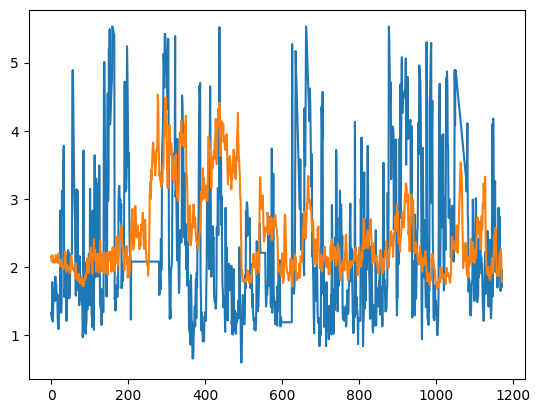

In [34]:
import seaborn as sns
sns.lineplot(data = Y_valid.to_list())
sns.lineplot(data = result.reshape(1172,))

### 重分配valid

In [2]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [3]:
df = pd.concat([df_train,df_test])

In [5]:
df = shuffle(df, random_state = 0)
df = df.reset_index(drop=True)

In [4]:
df_train = df.iloc[:2459].reset_index(drop=True)
df_valid = df.iloc[2459:2459+819].reset_index(drop=True)
df_test = df.iloc[2459+819:].reset_index(drop=True)

In [8]:
df_train.to_csv('./data/train_new.csv', index=False)
df_valid.to_csv('./data/valid_new.csv',index=False)
df_test.to_csv('./data/test_new.csv',index=False)

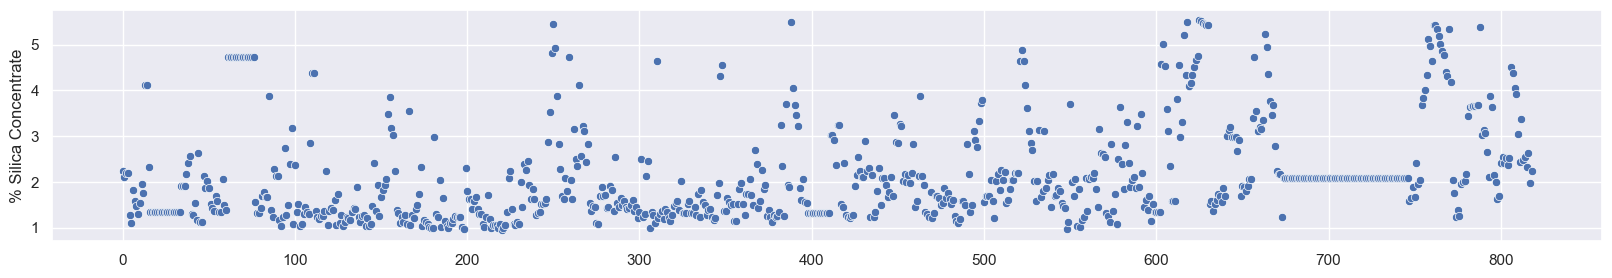

In [194]:
sns.scatterplot(data = df_valid['% Silica Concentrate'])
sns.set(rc={'figure.figsize':(20, 3)})

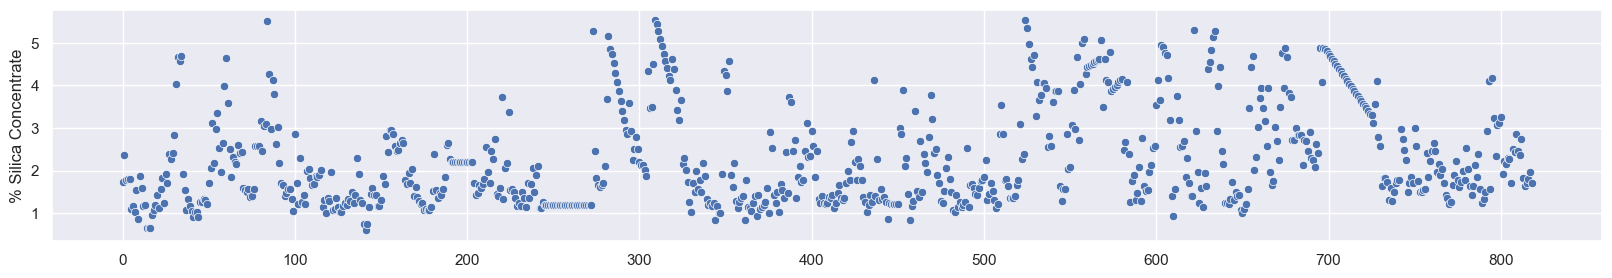

In [195]:
sns.scatterplot(data = df_test['% Silica Concentrate'])
sns.set(rc={'figure.figsize':(20, 3)})

### nn tunner

In [3]:
df_train = pd.read_csv('./data/train_new.csv')
df_valid = pd.read_csv('./data/valid_new.csv')
df_test = pd.read_csv('./data/test_new.csv')

In [4]:
df_train = shuffle(df_train, random_state=0)
df_valid = shuffle(df_valid, random_state=0)
X_train, Y_train = df_train[[u for u in df_train.columns if u not in ['date', 'datetime', '% Iron Concentrate', '% Silica Concentrate' ,'N_Fold']]],  df_train[['% Silica Concentrate']]
X_valid, Y_valid = df_valid[[u for u in df_valid.columns if u not in ['date', 'datetime', '% Iron Concentrate', '% Silica Concentrate']]],  df_valid['% Silica Concentrate']
X_test, Y_test = df_test[[u for u in df_test.columns if u not in ['date', 'datetime', '% Iron Concentrate', '% Silica Concentrate']]],  df_test['% Silica Concentrate']

In [5]:
y_train_np = Y_train.to_numpy()
x_train_np = X_train.to_numpy()
y_valid_np = Y_valid.to_numpy()
x_valid_np = X_valid.to_numpy()
y_test_np = Y_test.to_numpy()
x_test_np = X_test.to_numpy()

In [8]:
import keras_tuner

In [10]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Choice('unit_1', [16, 32, 64, 128, 512]), input_dim=126, activation='relu',bias_regularizer=l2(hp.Float('l21', 0.001, 0.1))))
    model.add(Dense(hp.Choice('unit_2', [16, 32, 64, 128, 512]), activation='relu',bias_regularizer=l2(hp.Float('l22', 0.001, 0.1))))
    model.add(Dropout(hp.Float('dr_1', 0.1, 1)))
    model.add(Dense(hp.Choice('unit_3', [16, 32, 64, 128, 512]), activation='relu',bias_regularizer=l2(hp.Float('l23', 0.001, 0.1))))
    model.add(Dropout(hp.Float('dr_2', 0.1, 1)))
    model.add(Dense(hp.Choice('unit_4', [16, 32, 64, 128, 512]), activation='relu',bias_regularizer=l2(hp.Float('l24', 0.001, 0.1))))
    #model.add(Dropout(hp.Float('dr_2', 0.1, 1)))
    model.add(keras.layers.Dense(1, activation='relu'))
    model.compile(loss="huber_loss", optimizer=Adam(learning_rate=hp.Float('lr', 0.0001, 0.1)), metrics=["mse","mae"])
    return model

In [11]:
tuner_new = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=100,
    project_name='test_add2_epoch100_nosh')

In [12]:
tuner_new.search(x_train_np, y_train_np, epochs=100, validation_data=(x_valid_np, y_valid_np))
best_model = tuner_new.get_best_models()[0]

Trial 100 Complete [00h 00m 30s]
val_loss: 0.42293599247932434

Best val_loss So Far: 0.36995401978492737
Total elapsed time: 00h 57m 36s
INFO:tensorflow:Oracle triggered exit


In [59]:
print(tuner_new.get_best_hyperparameters()[0].get('unit_1'))
print(tuner_new.get_best_hyperparameters()[0].get('unit_2'))
print(tuner_new.get_best_hyperparameters()[0].get('unit_3'))
print(tuner_new.get_best_hyperparameters()[0].get('dr_1'))
print(tuner_new.get_best_hyperparameters()[0].get('unit_4'))
print(tuner_new.get_best_hyperparameters()[0].get('dr_2'))
print(tuner_new.get_best_hyperparameters()[0].get('l21'))
print(tuner_new.get_best_hyperparameters()[0].get('l22'))
print(tuner_new.get_best_hyperparameters()[0].get('l23'))
print(tuner_new.get_best_hyperparameters()[0].get('l24'))
print(tuner_new.get_best_hyperparameters()[0].get('lr'))

128
512
128
0.1634775804841978
32
0.35812835435765056
0.0865013107630959
0.09838757609736976
0.05711173049869127
0.007498545087802719
0.000888097217498702


In [13]:
print(tuner_new.get_best_hyperparameters()[0].get('unit_1'))
print(tuner_new.get_best_hyperparameters()[0].get('unit_2'))
print(tuner_new.get_best_hyperparameters()[0].get('unit_3'))
print(tuner_new.get_best_hyperparameters()[0].get('dr_1'))
print(tuner_new.get_best_hyperparameters()[0].get('unit_4'))
print(tuner_new.get_best_hyperparameters()[0].get('dr_2'))
print(tuner_new.get_best_hyperparameters()[0].get('l21'))
print(tuner_new.get_best_hyperparameters()[0].get('l22'))
print(tuner_new.get_best_hyperparameters()[0].get('l23'))
print(tuner_new.get_best_hyperparameters()[0].get('l24'))
print(tuner_new.get_best_hyperparameters()[0].get('lr'))

512
128
128
0.46875591176112297
32
0.18022939139011473
0.029301191827299716
0.07648290538314256
0.08237735988872717
0.025070868294895816
0.0013840085728107953


* dp_2: Best val_loss So Far: 0.37038862705230713
* dp_3: Dense加一個到前面: 0.37143611907958984
* no drop: 0.39326587319374084 overfit

In [61]:
best_model.save('./model/nn_add2_epoch100') # save_format='h5'
#model_load = keras.models.load_model("./model/nn_drop1")

INFO:tensorflow:Assets written to: ./model/nn_add2_epoch100\assets


In [14]:
pred = best_model.predict(x_test_np)

26/26 [==============================] - 0s 2ms/step


In [15]:
predv = best_model.predict(x_valid_np)

26/26 [==============================] - 0s 2ms/step


In [16]:
predt = best_model.predict(x_train_np)

77/77 [==============================] - 0s 2ms/step


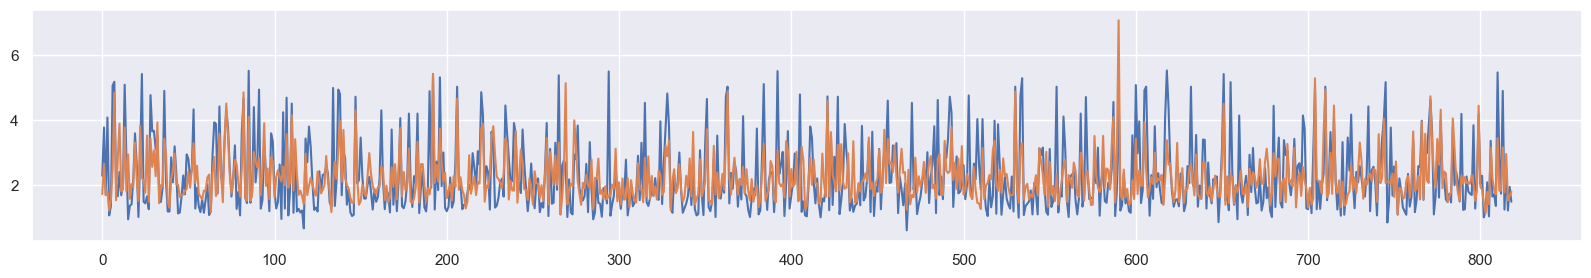

In [58]:
import seaborn as sns
sns.lineplot(data = y_test_np)
sns.lineplot(data = pred.reshape(819,))
sns.set(rc={'figure.figsize':(20, 3)})

In [55]:
# shuffle
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,r2_score
print(mean_squared_error(y_train_np, predt.reshape(2459,), squared=False))
print(mean_absolute_percentage_error(y_train_np, predt.reshape(2459,)))
print(r2_score(y_train_np, predt.reshape(2459,)))

0.6833450583435325
0.22353905191569956
0.6287858845271879


In [23]:
param = {'alpha': 0.3214014913730242,
 'learning_rate': 0.0309,
 'max_depth': 12,
 'min_child_weight': 0.075,
 'n_estimators': 851,
 'subsample': 0.7000000000000001}

In [25]:
import lightgbm as lgbm
lgbrModel = lgbm.LGBMRegressor(**param)
lgbrModel.fit(X_train ,Y_train['% Silica Concentrate_a1hr'])
# 使用訓練資料預測
predicted=lgbrModel.predict(X_valid)

In [27]:
predictedt=lgbrModel.predict(X_valid)

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,r2_score
print(mean_squared_error(Y_valid, predicted, squared=False))
print(mean_absolute_percentage_error(Y_valid, predicted))

1.1264152198012878
0.40461489828883485


In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,r2_score
print(mean_squared_error(Y_valid, predicted,squared=False))
print(mean_absolute_percentage_error(Y_valid, predicted))
print(r2_score(Y_valid, predicted))

0.7676165548906787
0.274857649333005
0.5458082003626374


In [31]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,r2_score
print(mean_squared_error(Y_valid, predicted,squared=False))
print(mean_absolute_percentage_error(Y_valid, predicted))
print(r2_score(Y_valid, predicted))

0.7676165548906787
0.274857649333005
0.5458082003626374


In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,r2_score
print(mean_squared_error(Y_test, predictedt, squared=False))
print(mean_absolute_percentage_error(Y_test, predictedt))
print(r2_score(Y_test, predictedt))

0.8287404841263493
0.3147053694350379
0.44552812012644927


In [29]:
r2_score(Y_valid, predicted)

0.021828020916027757

In [15]:
import xgboost as xgb
xgbrModel=xgb.XGBRegressor(**param)
xgbrModel.fit(X_train ,Y_train['% Silica Concentrate'])
# 預測
predicted=xgbrModel.predict(X_valid)

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,r2_score
print(mean_squared_error(Y_valid, predicted, squared=False))
print(mean_absolute_percentage_error(Y_valid, predicted))

0.8521476353984604
0.30046974245130387


In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,r2_score
predictedt=xgbrModel.predict(X_test)
print(mean_squared_error(Y_test, predictedt, squared=False))
print(mean_absolute_percentage_error(Y_test, predictedt))

0.8463829698071572
0.3186750551923238


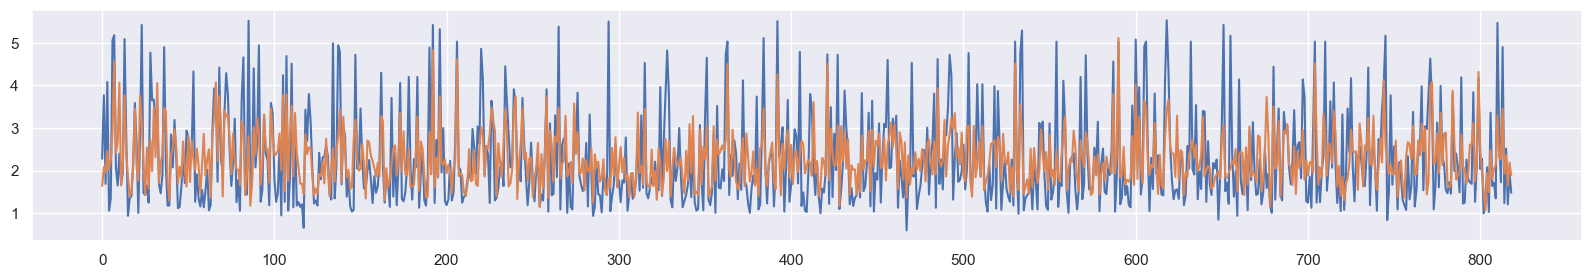

In [14]:
import seaborn as sns
sns.lineplot(data = Y_test.to_list())
sns.lineplot(data = predictedt)
sns.set(rc={'figure.figsize':(20, 3)})

In [22]:
fold_importance_df = pd.DataFrame()
fold_importance_df["feature"] = X_train.columns.values
fold_importance_df["importance"] = xgbrModel.feature_importances_

In [23]:
fold_importance_df.sort_values(by="importance",ascending=False)

,feature,importance
112,Flotation Column 01 Air Flow_6,0.043880
105,% Iron Feed_6,0.027541
63,% Iron Feed_4,0.025462
43,% Silica Feed_3,0.024944
101,Flotation Column 04 Level_5,0.023241
...,...,...
17,Flotation Column 04 Level,0.002965
8,Flotation Column 02 Air Flow,0.002535
12,Flotation Column 06 Air Flow,0.002422
4,Ore Pulp Flow,0.002393


In [22]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=4, random_state=0)
regr.fit(X_train, Y_train)

C:\Users\Ling\AppData\Local\Temp\ipykernel_17276\2445653608.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, Y_train)


RandomForestRegressor(max_depth=4, random_state=0)

In [23]:
predict = regr.predict(X_valid)

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,r2_score
print(mean_squared_error(Y_valid, predict, squared=False))
print(mean_absolute_percentage_error(Y_valid, predict))

1.108768268181561
0.38982931013430117


<AxesSubplot: >

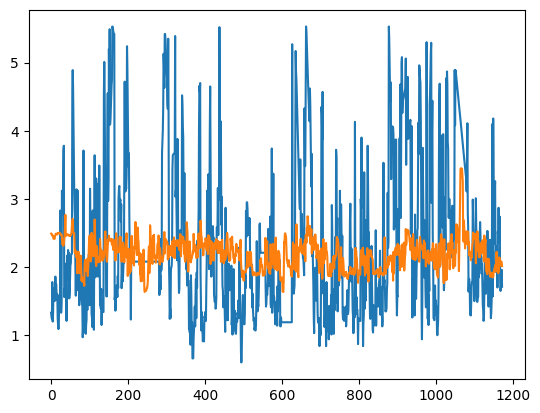

In [25]:
import seaborn as sns
sns.lineplot(data = Y_valid.to_list())
sns.lineplot(data = predict)

## modeling2
* lgbm + hypertunning
* xgb + hypertunning

In [20]:
def train_model_once(train_x,
                     train_y,
                     valid_x,
                     valid_y,
                     params={},
                     algo='XGB',
                     fold=0,
                     metric='rmse',
                     tunning=False):
    """
    Train model
    Args :
        train_x(pd.Dataframe) : X variables that need to be train in the model
        train_y(pd.Dataframe) : Y of the train data set
        valid_x(pd.Dataframe) : data for validation in this fold
        valid_y(pd.Dataframe) : Y of the validation data set
        params(dict) : parameters used in this fold
        algo(string) : method that used to train this model
        fold(int) : which fold is this model training, used for naming different models
        metric(string) : use which kind of objective to valuate the model
        tunning(bool) : Is now tunning parameters or not
    
    Return : 
        model
        list : prediction score of validation data
    
    """
    clf = xgb.XGBRegressor(**params) if algo == 'XGB' else lgbm.LGBMRegressor(**params)
    eval_set = [(valid_x, valid_y)]

    if not tunning:
        start_time = time.time()
        print('{' + str(fold + 1) +'}' + ' Start ' +
              algo + ' training with ' + str(train_x.shape) + ', valid with ' +
              str(valid_x.shape))

    model = clf.fit(train_x,
                    train_y,
                    eval_metric=metric,
                    eval_set=eval_set,
                    early_stopping_rounds=100,
                    verbose=100 if not tunning else False)

    best_iter = {}

    if algo == 'XGB':
        best_iter.update({'ntree_limit': model.best_ntree_limit})
    if algo == 'LGBM':
        best_iter.update({'num_iteration': model.best_iteration_})

    if not tunning:
        training_time = time.time() - start_time
        print('{' + str(fold + 1) + '}' +
              ' Infold training Time :' + str(int(training_time)) + ' sec.')
        # save the model
        if algo == 'XGB':
            file_name = "./model/XGB_Model_" + str(fold) + ".h5"
            model.save_model(file_name)
        if algo == 'LGBM':
            file_name = "./model/LGBM_Model_" + str(fold) + ".h5"
            with open(file_name, "wb") as output_file:
                None
                pickle.dump(model, output_file)

    valid_y_predict = model.predict(valid_x, **best_iter)
    rmse = mean_squared_error(Y_valid, valid_y_predict, squared=False)
    #return model, valid_y_predict
    return rmse

In [35]:
def dic_integer(param_dict):
    for x in param_dict:
        if hasattr(param_dict[x], 'is_integer') and param_dict[x].is_integer():
            param_dict.update({x: int(param_dict[x])})
    return param_dict


def dic_int(param_dict):
    unzip_dict = {}
    drop_dict = []
    for x in param_dict:
        if isinstance(param_dict[x], dict):
            unzip_dict.update(param_dict[x])
            drop_dict.append(x)
    for x in drop_dict:
        param_dict.pop(x, None)
    param_dict.update(unzip_dict)
    return dic_integer(param_dict)

def tune_hyperopt_cv(train_x,
                     train_y,
                     valid_x,
                     valid_y,
                     folds,
                     space,
                     turns=500):
    """
    Do hyperopt tunning
    Args :
        train_x(pd.Dataframe) : training data's X variable
        train_y(pd.Dataframe) : training data's y variable
        folds(int) : how many folds are set for training
        space(dict) : hyperopt tunning parameter space
        turns(int) : how many turns for this tunning
        
    Return : 
        dict : best parameter
    """
    def objective(params):
        params = dic_int(params)
        params.update({'silent': True})

        score = train_model_once(train_x=train_x,
                               train_y=train_y,
                               valid_x=valid_x,
                               valid_y=valid_y,
                               params=params,
                               algo='XGB',
                               fold=0,
                               metric='rmse',
                               tunning=True)
        return score

    best_param = fmin(fn=objective,
                      space=space,
                      algo=tpe.suggest,
                      max_evals=turns,
                      verbose=100)

    return  best_param #dic_int(space_eval(lgbm_space, best_param))

In [36]:
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, Trials, hp
import numpy as np
space = {
    'learning_rate':
    hp.qloguniform('learning_rate', np.log(1e-3), np.log(5e-2), 1e-4),
    'max_depth':
    hp.choice('max_depth', np.arange(1, 14, dtype=int)),
    'min_child_weight':
    hp.qloguniform('min_child_weight', -5, 5, 5e-3),
    'n_estimators':
    hp.choice('n_estimators', np.arange(10, 1000, dtype=int)),
    'alpha': hp.uniform('alpha', 0.0, 1.0),
    'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
    'colsample_bylevel': hp.uniform('colsample_bylevel', 0.8, 1.0),
    'gamma': hp.uniform('gamma', 0.0, 0.5),
    'lambda': hp.uniform('lambda', 0.0, 1.0),
    'scale_pos_weight': hp.uniform('scale_pos_weight', 0.01, 100)
}

In [37]:
# just for tuning parameter
params = tune_hyperopt_cv(train_x = X_train, train_y = Y_train, valid_x=X_valid,valid_y=Y_valid,folds = 10, space = space)

[16:21:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  0%|                                                                          | 0/500 [00:00<?, ?trial/s, best loss=?]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  0%|                                               | 1/500 [00:08<1:14:01,  8.90s/trial, best loss: 1.110778316818345]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[16:21:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  0%|▏                                             | 2/500 [00:22<1:38:19, 11.85s/trial, best loss: 1.1019791833751895]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:21:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  0%|▏                                             | 2/500 [00:23<1:38:19, 11.85s/trial, best loss: 1.1019791833751895]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  1%|▎                                             | 3/500 [00:52<2:44:42, 19.88s/trial, best loss: 1.1019791833751895]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:22:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  1%|▎                                             | 3/500 [00:52<2:44:42, 19.88s/trial, best loss: 1.1019791833751895]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  1%|▎                                             | 4/500 [00:58<2:00:03, 14.52s/trial, best loss: 1.1019791833751895]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[16:22:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  1%|▍                                             | 5/500 [01:06<1:40:31, 12.19s/trial, best loss: 1.1019791833751895]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:22:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  1%|▍                                             | 5/500 [01:06<1:40:31, 12.19s/trial, best loss: 1.1019791833751895]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  1%|▌                                             | 6/500 [01:10<1:17:26,  9.41s/trial, best loss: 1.1019791833751895]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:22:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  1%|▌                                             | 6/500 [01:10<1:17:26,  9.41s/trial, best loss: 1.1019791833751895]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  1%|▋                                             | 7/500 [01:24<1:29:49, 10.93s/trial, best loss: 1.1019791833751895]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:22:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  1%|▋                                             | 7/500 [01:24<1:29:49, 10.93s/trial, best loss: 1.1019791833751895]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  2%|▋                                             | 8/500 [01:26<1:06:32,  8.12s/trial, best loss: 1.1019791833751895]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[16:22:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  2%|▊                                               | 9/500 [01:27<48:21,  5.91s/trial, best loss: 1.1019791833751895]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:22:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  2%|▊                                               | 9/500 [01:28<48:21,  5.91s/trial, best loss: 1.1019791833751895]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  2%|▉                                            | 10/500 [01:44<1:14:53,  9.17s/trial, best loss: 1.1019791833751895]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[16:23:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  2%|▉                                            | 11/500 [01:47<1:00:29,  7.42s/trial, best loss: 1.1019791833751895]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[16:23:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  2%|█                                            | 12/500 [02:16<1:52:54, 13.88s/trial, best loss: 1.1019791833751895]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:23:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  2%|█                                            | 12/500 [02:16<1:52:54, 13.88s/trial, best loss: 1.1019791833751895]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  3%|█▏                                           | 13/500 [02:18<1:24:00, 10.35s/trial, best loss: 1.1019791833751895]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[16:23:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  3%|█▎                                           | 14/500 [02:21<1:04:57,  8.02s/trial, best loss: 1.1019791833751895]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:23:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  3%|█▎                                           | 14/500 [02:21<1:04:57,  8.02s/trial, best loss: 1.1019791833751895]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  3%|█▎                                           | 15/500 [02:28<1:02:38,  7.75s/trial, best loss: 1.1011106332408473]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:23:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  3%|█▎                                           | 15/500 [02:28<1:02:38,  7.75s/trial, best loss: 1.1011106332408473]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  3%|█▍                                           | 16/500 [02:44<1:21:37, 10.12s/trial, best loss: 1.1011106332408473]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:24:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  3%|█▍                                           | 16/500 [02:44<1:21:37, 10.12s/trial, best loss: 1.1011106332408473]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  3%|█▌                                           | 17/500 [02:52<1:17:07,  9.58s/trial, best loss: 1.1011106332408473]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[16:24:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  4%|█▌                                           | 18/500 [03:01<1:15:03,  9.34s/trial, best loss: 1.1011106332408473]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:24:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  4%|█▌                                           | 18/500 [03:01<1:15:03,  9.34s/trial, best loss: 1.1011106332408473]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  4%|█▋                                           | 19/500 [03:16<1:28:56, 11.09s/trial, best loss: 1.1011106332408473]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:24:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  4%|█▋                                           | 19/500 [03:16<1:28:56, 11.09s/trial, best loss: 1.1011106332408473]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  4%|█▊                                           | 20/500 [03:20<1:12:10,  9.02s/trial, best loss: 1.1011106332408473]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:24:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  4%|█▊                                           | 20/500 [03:20<1:12:10,  9.02s/trial, best loss: 1.1011106332408473]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  4%|█▉                                             | 21/500 [03:24<59:39,  7.47s/trial, best loss: 1.1011106332408473]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:24:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  4%|█▉                                             | 21/500 [03:24<59:39,  7.47s/trial, best loss: 1.1011106332408473]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  4%|██                                              | 22/500 [03:26<47:55,  6.01s/trial, best loss: 1.099307629110013]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[16:24:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  5%|██▏                                             | 23/500 [03:29<39:12,  4.93s/trial, best loss: 1.099307629110013]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[16:24:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  5%|██▎                                             | 24/500 [03:30<30:50,  3.89s/trial, best loss: 1.099307629110013]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:24:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  5%|██▎                                             | 24/500 [03:31<30:50,  3.89s/trial, best loss: 1.099307629110013]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  5%|██▎                                            | 25/500 [03:33<28:43,  3.63s/trial, best loss: 1.0934761986683896]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:24:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  5%|██▎                                            | 25/500 [03:34<28:43,  3.63s/trial, best loss: 1.0934761986683896]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  5%|██▍                                            | 26/500 [03:39<34:30,  4.37s/trial, best loss: 1.0934761986683896]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:24:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  5%|██▍                                            | 26/500 [03:40<34:30,  4.37s/trial, best loss: 1.0934761986683896]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  5%|██▌                                            | 27/500 [03:46<40:22,  5.12s/trial, best loss: 1.0934761986683896]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:25:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  5%|██▌                                            | 27/500 [03:47<40:22,  5.12s/trial, best loss: 1.0934761986683896]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  6%|██▋                                            | 28/500 [03:53<44:37,  5.67s/trial, best loss: 1.0934761986683896]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[16:25:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  6%|██▋                                            | 29/500 [04:00<46:52,  5.97s/trial, best loss: 1.0934761986683896]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:25:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  6%|██▋                                            | 29/500 [04:00<46:52,  5.97s/trial, best loss: 1.0934761986683896]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  6%|██▊                                            | 30/500 [04:03<39:47,  5.08s/trial, best loss: 1.0934761986683896]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:25:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  6%|██▊                                            | 30/500 [04:03<39:47,  5.08s/trial, best loss: 1.0934761986683896]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  6%|██▉                                            | 31/500 [04:10<43:42,  5.59s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[16:25:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  6%|███                                            | 32/500 [04:19<53:10,  6.82s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:25:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  6%|███                                            | 32/500 [04:20<53:10,  6.82s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  7%|██▉                                          | 33/500 [04:39<1:22:08, 10.55s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:25:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  7%|██▉                                          | 33/500 [04:39<1:22:08, 10.55s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  7%|███                                          | 34/500 [04:45<1:11:49,  9.25s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:26:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  7%|███                                          | 34/500 [04:45<1:11:49,  9.25s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  7%|███▏                                         | 35/500 [05:00<1:24:08, 10.86s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:26:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  7%|███▏                                         | 35/500 [05:00<1:24:08, 10.86s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  7%|███▏                                         | 36/500 [05:32<2:14:30, 17.39s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:26:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  7%|███▏                                         | 36/500 [05:32<2:14:30, 17.39s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  7%|███▎                                         | 37/500 [05:44<2:00:43, 15.65s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:27:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  7%|███▎                                         | 37/500 [05:44<2:00:43, 15.65s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  8%|███▍                                         | 38/500 [05:48<1:34:37, 12.29s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:27:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  8%|███▍                                         | 38/500 [05:48<1:34:37, 12.29s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  8%|███▌                                         | 39/500 [05:54<1:19:22, 10.33s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:27:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  8%|███▌                                         | 39/500 [05:54<1:19:22, 10.33s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  8%|███▌                                         | 40/500 [05:58<1:05:12,  8.51s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[16:27:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  8%|███▋                                         | 41/500 [06:05<1:01:35,  8.05s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[16:27:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  8%|███▉                                           | 42/500 [06:06<45:08,  5.91s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:27:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  8%|███▉                                           | 42/500 [06:06<45:08,  5.91s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  9%|████                                           | 43/500 [06:11<42:32,  5.59s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[16:27:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  9%|███▉                                         | 44/500 [06:25<1:02:34,  8.23s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:27:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  9%|███▉                                         | 44/500 [06:26<1:02:34,  8.23s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  9%|████                                         | 45/500 [06:42<1:20:42, 10.64s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:28:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  9%|████                                         | 45/500 [06:42<1:20:42, 10.64s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  9%|████▏                                        | 46/500 [06:48<1:11:19,  9.43s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:28:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  9%|████▏                                        | 46/500 [06:48<1:11:19,  9.43s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  9%|████▏                                        | 47/500 [07:16<1:53:18, 15.01s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:28:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

  9%|████▏                                        | 47/500 [07:16<1:53:18, 15.01s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 10%|████▎                                        | 48/500 [07:19<1:25:48, 11.39s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:28:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 10%|████▎                                        | 48/500 [07:19<1:25:48, 11.39s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 10%|████▍                                        | 49/500 [07:31<1:27:19, 11.62s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:28:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 10%|████▍                                        | 49/500 [07:32<1:27:19, 11.62s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 10%|████▌                                        | 50/500 [07:34<1:07:00,  8.93s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:28:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 10%|████▌                                        | 50/500 [07:34<1:07:00,  8.93s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 10%|████▌                                        | 51/500 [07:47<1:16:56, 10.28s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:29:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 10%|████▌                                        | 51/500 [07:48<1:16:56, 10.28s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 10%|████▋                                        | 52/500 [07:52<1:04:29,  8.64s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:29:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 10%|████▋                                        | 52/500 [07:52<1:04:29,  8.64s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 11%|████▉                                          | 53/500 [07:56<52:33,  7.05s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:29:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 11%|████▉                                          | 53/500 [07:56<52:33,  7.05s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 11%|█████                                          | 54/500 [08:05<57:50,  7.78s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:29:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 11%|█████                                          | 54/500 [08:05<57:50,  7.78s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 11%|█████▏                                         | 55/500 [08:08<46:46,  6.31s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:29:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 11%|█████▏                                         | 55/500 [08:08<46:46,  6.31s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 11%|█████▎                                         | 56/500 [08:11<38:51,  5.25s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[16:29:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 11%|█████▎                                         | 57/500 [08:16<39:12,  5.31s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:29:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 11%|█████▎                                         | 57/500 [08:16<39:12,  5.31s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 12%|█████▏                                       | 58/500 [08:36<1:11:34,  9.72s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:29:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 12%|█████▏                                       | 58/500 [08:36<1:11:34,  9.72s/trial, best loss: 1.0883877894814993]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 12%|█████▌                                         | 59/500 [08:40<57:53,  7.88s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:29:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 12%|█████▌                                         | 59/500 [08:40<57:53,  7.88s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 12%|█████▋                                         | 60/500 [08:44<50:19,  6.86s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:30:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 12%|█████▋                                         | 60/500 [08:45<50:19,  6.86s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 12%|█████▋                                         | 61/500 [08:48<42:56,  5.87s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:30:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 12%|█████▋                                         | 61/500 [08:48<42:56,  5.87s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 12%|█████▊                                         | 62/500 [08:53<41:03,  5.62s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:30:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 12%|█████▊                                         | 62/500 [08:53<41:03,  5.62s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 13%|█████▉                                         | 63/500 [08:57<38:02,  5.22s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:30:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 13%|█████▉                                         | 63/500 [08:57<38:02,  5.22s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 13%|█████▊                                       | 64/500 [09:13<1:00:55,  8.38s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:30:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 13%|█████▊                                       | 64/500 [09:13<1:00:55,  8.38s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 13%|██████                                         | 65/500 [09:16<48:48,  6.73s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[16:30:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 13%|██████▏                                        | 66/500 [09:24<52:52,  7.31s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:30:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 13%|██████▏                                        | 66/500 [09:25<52:52,  7.31s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 13%|██████▎                                        | 67/500 [09:29<46:49,  6.49s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:30:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 13%|██████▎                                        | 67/500 [09:29<46:49,  6.49s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 14%|██████▍                                        | 68/500 [09:38<51:36,  7.17s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:30:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 14%|██████▍                                        | 68/500 [09:38<51:36,  7.17s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 14%|██████▍                                        | 69/500 [09:47<56:02,  7.80s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:31:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 14%|██████▍                                        | 69/500 [09:47<56:02,  7.80s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 14%|██████▌                                        | 70/500 [09:55<56:24,  7.87s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:31:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 14%|██████▌                                        | 70/500 [09:55<56:24,  7.87s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 14%|██████▍                                      | 71/500 [10:07<1:05:56,  9.22s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:31:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 14%|██████▍                                      | 71/500 [10:08<1:05:56,  9.22s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 14%|██████▍                                      | 72/500 [10:15<1:03:05,  8.84s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:31:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 14%|██████▍                                      | 72/500 [10:16<1:03:05,  8.84s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 15%|██████▊                                        | 73/500 [10:19<52:33,  7.38s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:31:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 15%|██████▊                                        | 73/500 [10:20<52:33,  7.38s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 15%|██████▋                                      | 74/500 [10:35<1:09:35,  9.80s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:31:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 15%|██████▋                                      | 74/500 [10:35<1:09:35,  9.80s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 15%|███████                                        | 75/500 [10:38<55:07,  7.78s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:31:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 15%|███████                                        | 75/500 [10:38<55:07,  7.78s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 15%|███████▏                                       | 76/500 [10:43<50:21,  7.13s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[16:32:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 15%|███████▏                                       | 77/500 [10:50<49:19,  7.00s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:32:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 15%|███████▏                                       | 77/500 [10:50<49:19,  7.00s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 16%|███████▎                                       | 78/500 [10:51<36:20,  5.17s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:32:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 16%|███████▎                                       | 78/500 [10:51<36:20,  5.17s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 16%|███████▍                                       | 79/500 [10:56<35:37,  5.08s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



[16:32:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 16%|███████▌                                       | 80/500 [10:59<31:23,  4.48s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:32:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 16%|███████▌                                       | 80/500 [10:59<31:23,  4.48s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 16%|███████▎                                     | 81/500 [11:21<1:08:15,  9.77s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:32:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 16%|███████▎                                     | 81/500 [11:21<1:08:15,  9.77s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 16%|███████▋                                       | 82/500 [11:24<54:32,  7.83s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:32:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 16%|███████▋                                       | 82/500 [11:25<54:32,  7.83s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 17%|███████▊                                       | 83/500 [11:29<47:52,  6.89s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:32:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 17%|███████▊                                       | 83/500 [11:29<47:52,  6.89s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 17%|███████▌                                     | 84/500 [11:43<1:02:03,  8.95s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:33:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 17%|███████▌                                     | 84/500 [11:43<1:02:03,  8.95s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 17%|███████▋                                     | 85/500 [11:55<1:07:52,  9.81s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:33:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 17%|███████▋                                     | 85/500 [11:55<1:07:52,  9.81s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 17%|████████                                       | 86/500 [11:57<51:48,  7.51s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:33:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 17%|████████                                       | 86/500 [11:57<51:48,  7.51s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 17%|████████▏                                      | 87/500 [12:02<46:34,  6.77s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:33:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 17%|████████▏                                      | 87/500 [12:02<46:34,  6.77s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 18%|████████▎                                      | 88/500 [12:06<40:40,  5.92s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:33:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 18%|████████▎                                      | 88/500 [12:06<40:40,  5.92s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 18%|████████▎                                      | 89/500 [12:13<43:53,  6.41s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:33:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 18%|████████▎                                      | 89/500 [12:14<43:53,  6.41s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 18%|████████▍                                      | 90/500 [12:17<38:09,  5.59s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:33:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 18%|████████▍                                      | 90/500 [12:17<38:09,  5.59s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 18%|████████▏                                    | 91/500 [12:36<1:04:32,  9.47s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:33:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 18%|████████▏                                    | 91/500 [12:36<1:04:32,  9.47s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 18%|████████▋                                      | 92/500 [12:39<51:50,  7.62s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:33:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 18%|████████▋                                      | 92/500 [12:39<51:50,  7.62s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 19%|████████▋                                      | 93/500 [12:46<49:40,  7.32s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:34:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 19%|████████▋                                      | 93/500 [12:46<49:40,  7.32s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 19%|████████▊                                      | 94/500 [12:58<59:36,  8.81s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:34:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 19%|████████▊                                      | 94/500 [12:58<59:36,  8.81s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 19%|████████▉                                      | 95/500 [13:01<48:29,  7.18s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:34:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 19%|████████▉                                      | 95/500 [13:01<48:29,  7.18s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 19%|█████████                                      | 96/500 [13:04<38:36,  5.73s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:34:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 19%|█████████                                      | 96/500 [13:04<38:36,  5.73s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 19%|█████████                                      | 97/500 [13:06<30:55,  4.60s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:34:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 19%|█████████                                      | 97/500 [13:06<30:55,  4.60s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 20%|█████████▏                                     | 98/500 [13:12<33:47,  5.04s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:34:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 20%|█████████▏                                     | 98/500 [13:12<33:47,  5.04s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 20%|█████████▎                                     | 99/500 [13:14<27:31,  4.12s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:34:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 20%|█████████▎                                     | 99/500 [13:14<27:31,  4.12s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 20%|█████████▏                                    | 100/500 [13:26<43:52,  6.58s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:34:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 20%|█████████▏                                    | 100/500 [13:26<43:52,  6.58s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 20%|█████████▎                                    | 101/500 [13:32<42:11,  6.35s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:34:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 20%|█████████▎                                    | 101/500 [13:32<42:11,  6.35s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 20%|█████████▍                                    | 102/500 [13:37<39:33,  5.96s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:34:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 20%|█████████▍                                    | 102/500 [13:37<39:33,  5.96s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 21%|█████████▍                                    | 103/500 [13:43<40:06,  6.06s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:35:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 21%|█████████▍                                    | 103/500 [13:43<40:06,  6.06s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 21%|█████████▌                                    | 104/500 [13:47<36:46,  5.57s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:35:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 21%|█████████▌                                    | 104/500 [13:48<36:46,  5.57s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 21%|█████████▏                                  | 105/500 [14:09<1:09:03, 10.49s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:35:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 21%|█████████▏                                  | 105/500 [14:10<1:09:03, 10.49s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 21%|█████████▊                                    | 106/500 [14:14<57:18,  8.73s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:35:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 21%|█████████▊                                    | 106/500 [14:14<57:18,  8.73s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 21%|█████████▊                                    | 107/500 [14:17<44:57,  6.86s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:35:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 21%|█████████▊                                    | 107/500 [14:17<44:57,  6.86s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 22%|█████████▉                                    | 108/500 [14:21<39:55,  6.11s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:35:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 22%|█████████▉                                    | 108/500 [14:21<39:55,  6.11s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 22%|██████████                                    | 109/500 [14:22<30:51,  4.74s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:35:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 22%|██████████                                    | 109/500 [14:23<30:51,  4.74s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 22%|██████████                                    | 110/500 [14:30<36:47,  5.66s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:35:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 22%|██████████                                    | 110/500 [14:30<36:47,  5.66s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 22%|██████████▏                                   | 111/500 [14:39<43:24,  6.69s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:35:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 22%|██████████▏                                   | 111/500 [14:40<43:24,  6.69s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 22%|█████████▊                                  | 112/500 [14:59<1:08:07, 10.53s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:36:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 22%|█████████▊                                  | 112/500 [14:59<1:08:07, 10.53s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 23%|█████████▉                                  | 113/500 [15:08<1:04:43, 10.03s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:36:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 23%|█████████▉                                  | 113/500 [15:08<1:04:43, 10.03s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 23%|██████████                                  | 114/500 [15:21<1:10:22, 10.94s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:36:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 23%|██████████                                  | 114/500 [15:21<1:10:22, 10.94s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 23%|██████████▌                                   | 115/500 [15:25<57:23,  8.94s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:36:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 23%|██████████▌                                   | 115/500 [15:25<57:23,  8.94s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 23%|██████████▋                                   | 116/500 [15:27<44:20,  6.93s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:36:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 23%|██████████▋                                   | 116/500 [15:27<44:20,  6.93s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 23%|██████████▊                                   | 117/500 [15:38<52:10,  8.17s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:36:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 23%|██████████▊                                   | 117/500 [15:39<52:10,  8.17s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 24%|██████████▊                                   | 118/500 [15:39<37:54,  5.95s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:36:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 24%|██████████▊                                   | 118/500 [15:39<37:54,  5.95s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 24%|██████████▉                                   | 119/500 [15:47<42:03,  6.62s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:37:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 24%|██████████▉                                   | 119/500 [15:48<42:03,  6.62s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 24%|███████████                                   | 120/500 [15:58<50:04,  7.91s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:37:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 24%|███████████                                   | 120/500 [15:59<50:04,  7.91s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:37:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 24%|███████████▏                                  | 121/500 [15:59<35:50,  5.67s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 24%|███████████▏                                  | 122/500 [16:03<32:39,  5.18s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:37:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 24%|███████████▏                                  | 122/500 [16:03<32:39,  5.18s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 25%|███████████▎                                  | 123/500 [16:12<39:41,  6.32s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:37:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 25%|███████████▎                                  | 123/500 [16:12<39:41,  6.32s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 25%|███████████▍                                  | 124/500 [16:13<30:58,  4.94s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:37:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 25%|███████████▍                                  | 124/500 [16:14<30:58,  4.94s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 25%|███████████▌                                  | 125/500 [16:17<28:53,  4.62s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:37:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 25%|███████████▌                                  | 126/500 [16:18<20:48,  3.34s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:37:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 25%|███████████▌                                  | 126/500 [16:18<20:48,  3.34s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 25%|███████████▋                                  | 127/500 [16:29<35:05,  5.65s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:37:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 25%|███████████▋                                  | 127/500 [16:29<35:05,  5.65s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 26%|███████████▊                                  | 128/500 [16:41<47:15,  7.62s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:38:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 26%|███████████▊                                  | 128/500 [16:41<47:15,  7.62s/trial, best loss: 1.0778447663005168]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 26%|███████████▊                                  | 129/500 [16:44<38:34,  6.24s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:38:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 26%|███████████▊                                  | 129/500 [16:44<38:34,  6.24s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 26%|███████████▉                                  | 130/500 [16:54<46:20,  7.51s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:38:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 26%|███████████▉                                  | 130/500 [16:55<46:20,  7.51s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 26%|████████████                                  | 131/500 [16:57<36:47,  5.98s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:38:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 26%|████████████                                  | 131/500 [16:57<36:47,  5.98s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 26%|████████████▏                                 | 132/500 [17:01<32:56,  5.37s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:38:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 26%|████████████▏                                 | 132/500 [17:01<32:56,  5.37s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 27%|████████████▏                                 | 133/500 [17:02<25:38,  4.19s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:38:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 27%|████████████▏                                 | 133/500 [17:02<25:38,  4.19s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 27%|████████████▎                                 | 134/500 [17:03<19:34,  3.21s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:38:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 27%|████████████▎                                 | 134/500 [17:03<19:34,  3.21s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 27%|████████████▍                                 | 135/500 [17:04<15:03,  2.48s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:38:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 27%|████████████▍                                 | 135/500 [17:04<15:03,  2.48s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 27%|████████████▌                                 | 136/500 [17:09<18:57,  3.12s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:38:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 27%|████████████▌                                 | 136/500 [17:09<18:57,  3.12s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 27%|████████████▌                                 | 137/500 [17:17<29:16,  4.84s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:38:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 27%|████████████▌                                 | 137/500 [17:18<29:16,  4.84s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 28%|████████████▋                                 | 138/500 [17:19<24:00,  3.98s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:38:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 28%|████████████▋                                 | 138/500 [17:20<24:00,  3.98s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 28%|████████████▊                                 | 139/500 [17:39<52:26,  8.72s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:38:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 28%|████████████▊                                 | 139/500 [17:39<52:26,  8.72s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 28%|████████████▉                                 | 140/500 [17:46<49:19,  8.22s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:39:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 28%|████████████▉                                 | 140/500 [17:46<49:19,  8.22s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 28%|████████████▉                                 | 141/500 [17:47<35:50,  5.99s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:39:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 28%|████████████▉                                 | 141/500 [17:47<35:50,  5.99s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 28%|█████████████                                 | 142/500 [17:49<27:51,  4.67s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:39:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 28%|█████████████                                 | 142/500 [17:49<27:51,  4.67s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 29%|█████████████▏                                | 143/500 [17:54<29:22,  4.94s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:39:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 29%|█████████████▏                                | 143/500 [17:54<29:22,  4.94s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 29%|█████████████▏                                | 144/500 [18:07<44:02,  7.42s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:39:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 29%|█████████████▏                                | 144/500 [18:08<44:02,  7.42s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 29%|█████████████▎                                | 145/500 [18:15<44:00,  7.44s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:39:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 29%|█████████████▎                                | 145/500 [18:15<44:00,  7.44s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 29%|█████████████▍                                | 146/500 [18:19<39:01,  6.61s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:39:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 29%|█████████████▍                                | 146/500 [18:20<39:01,  6.61s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 29%|█████████████▌                                | 147/500 [18:26<39:15,  6.67s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:39:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 29%|█████████████▌                                | 147/500 [18:27<39:15,  6.67s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 30%|█████████████▌                                | 148/500 [18:32<38:12,  6.51s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:39:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 30%|█████████████▌                                | 148/500 [18:33<38:12,  6.51s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 30%|█████████████▋                                | 149/500 [18:39<37:23,  6.39s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:39:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 30%|█████████████▋                                | 149/500 [18:39<37:23,  6.39s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 30%|█████████████▊                                | 150/500 [18:43<33:23,  5.72s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:40:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 30%|█████████████▊                                | 150/500 [18:43<33:23,  5.72s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 30%|█████████████▉                                | 151/500 [18:45<26:51,  4.62s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:40:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 30%|█████████████▉                                | 151/500 [18:45<26:51,  4.62s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 30%|█████████████▉                                | 152/500 [18:51<30:12,  5.21s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:40:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 30%|█████████████▉                                | 152/500 [18:52<30:12,  5.21s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 31%|██████████████                                | 153/500 [19:11<54:43,  9.46s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:40:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 31%|██████████████                                | 153/500 [19:11<54:43,  9.46s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 31%|██████████████▏                               | 154/500 [19:16<47:15,  8.20s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:40:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 31%|██████████████▏                               | 154/500 [19:16<47:15,  8.20s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 31%|██████████████▎                               | 155/500 [19:17<35:01,  6.09s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:40:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 31%|██████████████▎                               | 155/500 [19:17<35:01,  6.09s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 31%|██████████████▎                               | 156/500 [19:21<30:46,  5.37s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:40:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 31%|██████████████▎                               | 156/500 [19:21<30:46,  5.37s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 31%|██████████████▍                               | 157/500 [19:22<23:23,  4.09s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:40:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 31%|██████████████▍                               | 157/500 [19:22<23:23,  4.09s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 32%|██████████████▌                               | 158/500 [19:23<17:22,  3.05s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:40:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 32%|██████████████▌                               | 158/500 [19:23<17:22,  3.05s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 32%|██████████████▋                               | 159/500 [19:26<17:54,  3.15s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:40:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 32%|██████████████▋                               | 159/500 [19:26<17:54,  3.15s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 32%|██████████████▋                               | 160/500 [19:31<21:36,  3.81s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:40:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 32%|██████████████▋                               | 160/500 [19:32<21:36,  3.81s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 32%|██████████████▊                               | 161/500 [19:36<22:14,  3.94s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:40:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 32%|██████████████▊                               | 161/500 [19:36<22:14,  3.94s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 32%|██████████████▉                               | 162/500 [19:41<24:47,  4.40s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:41:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 32%|██████████████▉                               | 162/500 [19:41<24:47,  4.40s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 33%|██████████████▉                               | 163/500 [19:43<20:29,  3.65s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:41:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 33%|██████████████▉                               | 163/500 [19:43<20:29,  3.65s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 33%|███████████████                               | 164/500 [19:46<18:56,  3.38s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:41:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 33%|███████████████                               | 164/500 [19:46<18:56,  3.38s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 33%|███████████████▏                              | 165/500 [19:50<20:04,  3.60s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:41:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 33%|███████████████▏                              | 165/500 [19:50<20:04,  3.60s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 33%|███████████████▎                              | 166/500 [19:56<25:03,  4.50s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:41:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 33%|███████████████▎                              | 166/500 [19:57<25:03,  4.50s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 33%|███████████████▎                              | 167/500 [20:01<25:22,  4.57s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:41:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 33%|███████████████▎                              | 167/500 [20:01<25:22,  4.57s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 34%|███████████████▍                              | 168/500 [20:08<29:05,  5.26s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:41:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 34%|███████████████▍                              | 168/500 [20:08<29:05,  5.26s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 34%|███████████████▌                              | 169/500 [20:21<41:11,  7.47s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:41:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 34%|███████████████▌                              | 169/500 [20:21<41:11,  7.47s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 34%|███████████████▋                              | 170/500 [20:25<35:17,  6.42s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:41:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 34%|███████████████▋                              | 170/500 [20:25<35:17,  6.42s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 34%|███████████████                             | 171/500 [20:50<1:06:41, 12.16s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:42:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 34%|███████████████                             | 171/500 [20:50<1:06:41, 12.16s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 34%|███████████████▊                              | 172/500 [20:58<59:05, 10.81s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:42:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 34%|███████████████▊                              | 172/500 [20:58<59:05, 10.81s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 35%|███████████████▉                              | 173/500 [21:04<51:52,  9.52s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:42:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 35%|███████████████▉                              | 173/500 [21:05<51:52,  9.52s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 35%|████████████████                              | 174/500 [21:05<38:07,  7.02s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:42:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 35%|████████████████                              | 174/500 [21:06<38:07,  7.02s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 35%|████████████████                              | 175/500 [21:08<30:29,  5.63s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:42:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 35%|████████████████                              | 175/500 [21:08<30:29,  5.63s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 35%|████████████████▏                             | 176/500 [21:15<32:12,  5.97s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:42:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 35%|████████████████▏                             | 176/500 [21:15<32:12,  5.97s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 35%|████████████████▎                             | 177/500 [21:26<40:36,  7.54s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:42:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 35%|████████████████▎                             | 177/500 [21:26<40:36,  7.54s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 36%|████████████████▍                             | 178/500 [21:30<35:12,  6.56s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:42:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 36%|████████████████▍                             | 178/500 [21:30<35:12,  6.56s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 36%|████████████████▍                             | 179/500 [21:38<37:49,  7.07s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:42:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 36%|████████████████▍                             | 179/500 [21:39<37:49,  7.07s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 36%|████████████████▌                             | 180/500 [21:40<28:32,  5.35s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:42:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 36%|████████████████▌                             | 180/500 [21:40<28:32,  5.35s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 36%|████████████████▋                             | 181/500 [21:46<30:08,  5.67s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:43:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 36%|████████████████▋                             | 181/500 [21:46<30:08,  5.67s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 36%|████████████████▋                             | 182/500 [21:56<36:58,  6.98s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:43:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 36%|████████████████▋                             | 182/500 [21:56<36:58,  6.98s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 37%|████████████████▊                             | 183/500 [22:03<36:24,  6.89s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:43:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 37%|████████████████▊                             | 183/500 [22:03<36:24,  6.89s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 37%|████████████████▏                           | 184/500 [22:25<1:00:41, 11.52s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:43:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 37%|████████████████▏                           | 184/500 [22:25<1:00:41, 11.52s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 37%|█████████████████                             | 185/500 [22:31<50:48,  9.68s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:43:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 37%|█████████████████                             | 185/500 [22:31<50:48,  9.68s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 37%|█████████████████                             | 186/500 [22:42<53:28, 10.22s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:44:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 37%|█████████████████                             | 186/500 [22:42<53:28, 10.22s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 37%|█████████████████▏                            | 187/500 [22:47<44:22,  8.51s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:44:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 37%|█████████████████▏                            | 187/500 [22:47<44:22,  8.51s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 38%|█████████████████▎                            | 188/500 [22:52<39:45,  7.65s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:44:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 38%|█████████████████▎                            | 188/500 [22:52<39:45,  7.65s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 38%|█████████████████▍                            | 189/500 [22:56<33:03,  6.38s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:44:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 38%|█████████████████▍                            | 189/500 [22:56<33:03,  6.38s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 38%|█████████████████▍                            | 190/500 [22:58<27:29,  5.32s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:44:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 38%|█████████████████▍                            | 190/500 [22:59<27:29,  5.32s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 38%|█████████████████▌                            | 191/500 [23:01<23:38,  4.59s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:44:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 38%|█████████████████▌                            | 191/500 [23:02<23:38,  4.59s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 38%|█████████████████▋                            | 192/500 [23:04<20:34,  4.01s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:44:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 38%|█████████████████▋                            | 192/500 [23:04<20:34,  4.01s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 39%|█████████████████▊                            | 193/500 [23:09<22:27,  4.39s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:44:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 39%|█████████████████▊                            | 193/500 [23:09<22:27,  4.39s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 39%|█████████████████▊                            | 194/500 [23:10<16:45,  3.29s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:44:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 39%|█████████████████▊                            | 194/500 [23:10<16:45,  3.29s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 39%|█████████████████▉                            | 195/500 [23:19<25:27,  5.01s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:44:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 39%|█████████████████▉                            | 195/500 [23:19<25:27,  5.01s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 39%|██████████████████                            | 196/500 [23:35<42:13,  8.34s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:44:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 39%|██████████████████                            | 196/500 [23:35<42:13,  8.34s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 39%|██████████████████                            | 197/500 [23:41<37:49,  7.49s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:44:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 39%|██████████████████                            | 197/500 [23:41<37:49,  7.49s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 40%|██████████████████▏                           | 198/500 [23:45<33:02,  6.57s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:45:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 40%|██████████████████▏                           | 198/500 [23:45<33:02,  6.57s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 40%|██████████████████▎                           | 199/500 [23:50<31:00,  6.18s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:45:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 40%|██████████████████▎                           | 199/500 [23:51<31:00,  6.18s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 40%|██████████████████▍                           | 200/500 [24:04<42:17,  8.46s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:45:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 40%|██████████████████▍                           | 200/500 [24:04<42:17,  8.46s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 40%|██████████████████▍                           | 201/500 [24:11<40:05,  8.05s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:45:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 40%|██████████████████▍                           | 201/500 [24:11<40:05,  8.05s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 40%|██████████████████▌                           | 202/500 [24:18<37:58,  7.65s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:45:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 40%|██████████████████▌                           | 202/500 [24:18<37:58,  7.65s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 41%|██████████████████▋                           | 203/500 [24:24<35:46,  7.23s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:45:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 41%|██████████████████▋                           | 203/500 [24:24<35:46,  7.23s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 41%|██████████████████▊                           | 204/500 [24:34<39:46,  8.06s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:45:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 41%|██████████████████▊                           | 204/500 [24:34<39:46,  8.06s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 41%|██████████████████▊                           | 205/500 [24:43<40:07,  8.16s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:46:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 41%|██████████████████▊                           | 205/500 [24:43<40:07,  8.16s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 41%|██████████████████▉                           | 206/500 [24:46<32:50,  6.70s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:46:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 41%|██████████████████▉                           | 206/500 [24:46<32:50,  6.70s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 41%|███████████████████                           | 207/500 [24:47<24:03,  4.93s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:46:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 41%|███████████████████                           | 207/500 [24:47<24:03,  4.93s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 42%|███████████████████▏                          | 208/500 [24:55<29:10,  6.00s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:46:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 42%|███████████████████▏                          | 208/500 [24:55<29:10,  6.00s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 42%|███████████████████▏                          | 209/500 [25:01<28:52,  5.95s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:46:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 42%|███████████████████▏                          | 209/500 [25:01<28:52,  5.95s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 42%|███████████████████▎                          | 210/500 [25:05<26:32,  5.49s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:46:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 42%|███████████████████▎                          | 210/500 [25:06<26:32,  5.49s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 42%|███████████████████▍                          | 211/500 [25:11<27:04,  5.62s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:46:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 42%|███████████████████▍                          | 211/500 [25:12<27:04,  5.62s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 42%|███████████████████▌                          | 212/500 [25:15<24:47,  5.17s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:46:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 42%|███████████████████▌                          | 212/500 [25:16<24:47,  5.17s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 43%|███████████████████▌                          | 213/500 [25:38<50:01, 10.46s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:46:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 43%|███████████████████▌                          | 213/500 [25:39<50:01, 10.46s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 43%|███████████████████▋                          | 214/500 [25:41<38:13,  8.02s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:46:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 43%|███████████████████▋                          | 214/500 [25:41<38:13,  8.02s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 43%|███████████████████▊                          | 215/500 [25:45<32:57,  6.94s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:47:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 43%|███████████████████▊                          | 215/500 [25:45<32:57,  6.94s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 43%|███████████████████▊                          | 216/500 [25:54<35:31,  7.51s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:47:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 43%|███████████████████▊                          | 216/500 [25:54<35:31,  7.51s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 43%|███████████████████▉                          | 217/500 [25:56<28:21,  6.01s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:47:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 43%|███████████████████▉                          | 217/500 [25:57<28:21,  6.01s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 44%|████████████████████                          | 218/500 [26:00<24:51,  5.29s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:47:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 44%|████████████████████                          | 218/500 [26:00<24:51,  5.29s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 44%|████████████████████▏                         | 219/500 [26:26<53:53, 11.51s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:47:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 44%|████████████████████▏                         | 219/500 [26:26<53:53, 11.51s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 44%|████████████████████▏                         | 220/500 [26:29<42:01,  9.00s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:47:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 44%|████████████████████▏                         | 220/500 [26:29<42:01,  9.00s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 44%|████████████████████▎                         | 221/500 [26:32<33:40,  7.24s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:47:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 44%|████████████████████▎                         | 221/500 [26:32<33:40,  7.24s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 44%|████████████████████▍                         | 222/500 [26:33<24:41,  5.33s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:47:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 44%|████████████████████▍                         | 222/500 [26:33<24:41,  5.33s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 45%|████████████████████▌                         | 223/500 [26:34<18:53,  4.09s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:47:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 45%|████████████████████▌                         | 223/500 [26:35<18:53,  4.09s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 45%|████████████████████▌                         | 224/500 [26:46<29:06,  6.33s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:48:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 45%|████████████████████▌                         | 224/500 [26:46<29:06,  6.33s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 45%|████████████████████▋                         | 225/500 [26:48<23:54,  5.21s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:48:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 45%|████████████████████▋                         | 225/500 [26:49<23:54,  5.21s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 45%|████████████████████▊                         | 226/500 [27:10<46:02, 10.08s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:48:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 45%|████████████████████▊                         | 226/500 [27:10<46:02, 10.08s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 45%|████████████████████▉                         | 227/500 [27:13<35:58,  7.91s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:48:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 45%|████████████████████▉                         | 227/500 [27:13<35:58,  7.91s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 46%|████████████████████▉                         | 228/500 [27:20<35:16,  7.78s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:48:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 46%|████████████████████▉                         | 228/500 [27:21<35:16,  7.78s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 46%|█████████████████████                         | 229/500 [27:31<39:09,  8.67s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:48:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 46%|█████████████████████                         | 229/500 [27:31<39:09,  8.67s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 46%|█████████████████████▏                        | 230/500 [27:35<32:45,  7.28s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:48:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 46%|█████████████████████▏                        | 230/500 [27:35<32:45,  7.28s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 46%|█████████████████████▎                        | 231/500 [27:41<31:36,  7.05s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:49:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 46%|█████████████████████▎                        | 231/500 [27:42<31:36,  7.05s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 46%|█████████████████████▎                        | 232/500 [27:47<29:00,  6.49s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:49:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 46%|█████████████████████▎                        | 232/500 [27:47<29:00,  6.49s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 47%|█████████████████████▍                        | 233/500 [27:49<23:57,  5.38s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:49:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 47%|█████████████████████▍                        | 233/500 [27:50<23:57,  5.38s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 47%|█████████████████████▌                        | 234/500 [27:54<22:42,  5.12s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:49:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 47%|█████████████████████▌                        | 234/500 [27:54<22:42,  5.12s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 47%|█████████████████████▌                        | 235/500 [27:55<17:44,  4.02s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:49:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 47%|█████████████████████▌                        | 235/500 [27:56<17:44,  4.02s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 47%|█████████████████████▋                        | 236/500 [28:05<24:22,  5.54s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:49:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 47%|█████████████████████▋                        | 236/500 [28:05<24:22,  5.54s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 47%|█████████████████████▊                        | 237/500 [28:34<55:39, 12.70s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:49:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 47%|█████████████████████▊                        | 237/500 [28:34<55:39, 12.70s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 48%|█████████████████████▉                        | 238/500 [28:39<45:00, 10.31s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:49:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 48%|█████████████████████▉                        | 238/500 [28:39<45:00, 10.31s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 48%|█████████████████████▉                        | 239/500 [28:53<49:59, 11.49s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:50:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 48%|█████████████████████▉                        | 239/500 [28:53<49:59, 11.49s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 48%|██████████████████████                        | 240/500 [28:54<36:22,  8.40s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:50:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 48%|██████████████████████                        | 240/500 [28:54<36:22,  8.40s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 48%|██████████████████████▏                       | 241/500 [28:56<27:30,  6.37s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:50:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 48%|██████████████████████▏                       | 241/500 [28:56<27:30,  6.37s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 48%|██████████████████████▎                       | 242/500 [29:03<28:42,  6.68s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:50:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 48%|██████████████████████▎                       | 242/500 [29:03<28:42,  6.68s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 49%|██████████████████████▎                       | 243/500 [29:09<27:02,  6.31s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:50:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 49%|██████████████████████▎                       | 243/500 [29:09<27:02,  6.31s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 49%|██████████████████████▍                       | 244/500 [29:13<24:20,  5.71s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:50:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 49%|██████████████████████▍                       | 244/500 [29:13<24:20,  5.71s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 49%|██████████████████████▌                       | 245/500 [29:16<21:18,  5.02s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:50:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 49%|██████████████████████▌                       | 245/500 [29:17<21:18,  5.02s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 49%|██████████████████████▋                       | 246/500 [29:30<31:50,  7.52s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:50:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 49%|██████████████████████▋                       | 246/500 [29:30<31:50,  7.52s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 49%|██████████████████████▋                       | 247/500 [29:36<29:41,  7.04s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:50:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 49%|██████████████████████▋                       | 247/500 [29:36<29:41,  7.04s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 50%|██████████████████████▊                       | 248/500 [29:44<30:47,  7.33s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:51:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 50%|██████████████████████▊                       | 248/500 [29:44<30:47,  7.33s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 50%|██████████████████████▉                       | 249/500 [29:45<22:55,  5.48s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:51:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 50%|██████████████████████▉                       | 249/500 [29:45<22:55,  5.48s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 50%|███████████████████████                       | 250/500 [29:57<31:33,  7.57s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:51:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 50%|███████████████████████                       | 250/500 [29:57<31:33,  7.57s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 50%|███████████████████████                       | 251/500 [30:02<27:47,  6.70s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:51:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 50%|███████████████████████                       | 251/500 [30:02<27:47,  6.70s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 50%|███████████████████████▏                      | 252/500 [30:06<24:59,  6.05s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:51:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 50%|███████████████████████▏                      | 252/500 [30:07<24:59,  6.05s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 51%|███████████████████████▎                      | 253/500 [30:08<19:26,  4.72s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:51:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 51%|███████████████████████▎                      | 253/500 [30:08<19:26,  4.72s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 51%|███████████████████████▎                      | 254/500 [30:15<22:03,  5.38s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:51:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 51%|███████████████████████▎                      | 254/500 [30:15<22:03,  5.38s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 51%|███████████████████████▍                      | 255/500 [30:27<29:54,  7.32s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:51:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 51%|███████████████████████▍                      | 255/500 [30:27<29:54,  7.32s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 51%|███████████████████████▌                      | 256/500 [30:40<36:24,  8.95s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:51:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 51%|███████████████████████▌                      | 256/500 [30:40<36:24,  8.95s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 51%|███████████████████████▋                      | 257/500 [30:44<30:40,  7.57s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:52:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 51%|███████████████████████▋                      | 257/500 [30:44<30:40,  7.57s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 52%|███████████████████████▋                      | 258/500 [30:44<22:05,  5.48s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:52:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 52%|███████████████████████▋                      | 258/500 [30:45<22:05,  5.48s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 52%|███████████████████████▊                      | 259/500 [30:46<17:05,  4.25s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:52:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 52%|███████████████████████▊                      | 259/500 [30:46<17:05,  4.25s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 52%|███████████████████████▉                      | 260/500 [30:49<15:56,  3.99s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:52:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 52%|███████████████████████▉                      | 260/500 [30:49<15:56,  3.99s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 52%|████████████████████████                      | 261/500 [30:52<14:23,  3.61s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:52:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 52%|████████████████████████                      | 261/500 [30:52<14:23,  3.61s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 52%|████████████████████████                      | 262/500 [30:54<13:01,  3.28s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:52:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 52%|████████████████████████                      | 262/500 [30:55<13:01,  3.28s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 53%|████████████████████████▏                     | 263/500 [30:56<10:28,  2.65s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:52:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 53%|████████████████████████▏                     | 263/500 [30:56<10:28,  2.65s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 53%|████████████████████████▎                     | 264/500 [31:00<12:09,  3.09s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:52:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 53%|████████████████████████▎                     | 264/500 [31:00<12:09,  3.09s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 53%|████████████████████████▍                     | 265/500 [31:01<10:02,  2.56s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:52:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 53%|████████████████████████▍                     | 265/500 [31:01<10:02,  2.56s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 53%|████████████████████████▍                     | 266/500 [31:04<10:40,  2.74s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:52:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 53%|████████████████████████▍                     | 266/500 [31:05<10:40,  2.74s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 53%|████████████████████████▌                     | 267/500 [31:06<09:20,  2.41s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:52:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 53%|████████████████████████▌                     | 267/500 [31:06<09:20,  2.41s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 54%|████████████████████████▋                     | 268/500 [31:07<07:55,  2.05s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:52:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 54%|████████████████████████▋                     | 268/500 [31:07<07:55,  2.05s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 54%|████████████████████████▋                     | 269/500 [31:09<08:12,  2.13s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:52:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 54%|████████████████████████▋                     | 269/500 [31:10<08:12,  2.13s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 54%|████████████████████████▊                     | 270/500 [31:28<26:43,  6.97s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:52:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 54%|████████████████████████▊                     | 270/500 [31:28<26:43,  6.97s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 54%|████████████████████████▉                     | 271/500 [31:36<28:19,  7.42s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:52:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 54%|████████████████████████▉                     | 271/500 [31:36<28:19,  7.42s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 54%|█████████████████████████                     | 272/500 [31:38<22:12,  5.84s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:52:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 54%|█████████████████████████                     | 272/500 [31:39<22:12,  5.84s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 55%|█████████████████████████                     | 273/500 [31:46<24:21,  6.44s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:53:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 55%|█████████████████████████                     | 273/500 [31:46<24:21,  6.44s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 55%|█████████████████████████▏                    | 274/500 [31:51<22:26,  5.96s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:53:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 55%|█████████████████████████▏                    | 274/500 [31:51<22:26,  5.96s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 55%|█████████████████████████▎                    | 275/500 [31:55<19:40,  5.25s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:53:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 55%|█████████████████████████▎                    | 275/500 [31:55<19:40,  5.25s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 55%|█████████████████████████▍                    | 276/500 [32:02<21:30,  5.76s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:53:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 55%|█████████████████████████▍                    | 276/500 [32:02<21:30,  5.76s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 55%|█████████████████████████▍                    | 277/500 [32:06<20:25,  5.49s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:53:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 55%|█████████████████████████▍                    | 277/500 [32:07<20:25,  5.49s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 56%|█████████████████████████▌                    | 278/500 [32:09<16:49,  4.55s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:53:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 56%|█████████████████████████▌                    | 278/500 [32:09<16:49,  4.55s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 56%|█████████████████████████▋                    | 279/500 [32:11<14:26,  3.92s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:53:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 56%|█████████████████████████▋                    | 279/500 [32:12<14:26,  3.92s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 56%|█████████████████████████▊                    | 280/500 [32:16<14:50,  4.05s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:53:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 56%|█████████████████████████▊                    | 280/500 [32:16<14:50,  4.05s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 56%|█████████████████████████▊                    | 281/500 [32:24<19:18,  5.29s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:53:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 56%|█████████████████████████▊                    | 281/500 [32:24<19:18,  5.29s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 56%|█████████████████████████▉                    | 282/500 [32:33<24:01,  6.61s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:53:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 56%|█████████████████████████▉                    | 282/500 [32:34<24:01,  6.61s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 57%|██████████████████████████                    | 283/500 [32:39<22:48,  6.31s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:53:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 57%|██████████████████████████                    | 283/500 [32:39<22:48,  6.31s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 57%|██████████████████████████▏                   | 284/500 [32:45<21:57,  6.10s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:54:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 57%|██████████████████████████▏                   | 284/500 [32:45<21:57,  6.10s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 57%|██████████████████████████▏                   | 285/500 [32:49<19:29,  5.44s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:54:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 57%|██████████████████████████▏                   | 285/500 [32:49<19:29,  5.44s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 57%|██████████████████████████▎                   | 286/500 [32:53<18:15,  5.12s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:54:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 57%|██████████████████████████▎                   | 286/500 [32:53<18:15,  5.12s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 57%|██████████████████████████▍                   | 287/500 [33:00<20:22,  5.74s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:54:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 57%|██████████████████████████▍                   | 287/500 [33:00<20:22,  5.74s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 58%|██████████████████████████▍                   | 288/500 [33:07<21:14,  6.01s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:54:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 58%|██████████████████████████▍                   | 288/500 [33:07<21:14,  6.01s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 58%|██████████████████████████▌                   | 289/500 [33:12<20:40,  5.88s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:54:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 58%|██████████████████████████▌                   | 289/500 [33:13<20:40,  5.88s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 58%|██████████████████████████▋                   | 290/500 [33:30<33:23,  9.54s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:54:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 58%|██████████████████████████▋                   | 290/500 [33:31<33:23,  9.54s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 58%|██████████████████████████▊                   | 291/500 [33:40<33:18,  9.56s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:54:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 58%|██████████████████████████▊                   | 291/500 [33:40<33:18,  9.56s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 58%|██████████████████████████▊                   | 292/500 [33:53<37:01, 10.68s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:55:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 58%|██████████████████████████▊                   | 292/500 [33:54<37:01, 10.68s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 59%|██████████████████████████▉                   | 293/500 [33:58<30:54,  8.96s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:55:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 59%|██████████████████████████▉                   | 293/500 [33:58<30:54,  8.96s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 59%|███████████████████████████                   | 294/500 [34:01<24:34,  7.16s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:55:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 59%|███████████████████████████                   | 294/500 [34:02<24:34,  7.16s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 59%|███████████████████████████▏                  | 295/500 [34:05<20:43,  6.06s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:55:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 59%|███████████████████████████▏                  | 295/500 [34:05<20:43,  6.06s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 59%|███████████████████████████▏                  | 296/500 [34:09<18:47,  5.53s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:55:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 59%|███████████████████████████▏                  | 296/500 [34:09<18:47,  5.53s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 59%|███████████████████████████▎                  | 297/500 [34:15<19:07,  5.65s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:55:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 59%|███████████████████████████▎                  | 297/500 [34:15<19:07,  5.65s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 60%|███████████████████████████▍                  | 298/500 [34:22<20:55,  6.21s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:55:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 60%|███████████████████████████▍                  | 298/500 [34:23<20:55,  6.21s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 60%|███████████████████████████▌                  | 299/500 [34:28<20:19,  6.07s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:55:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 60%|███████████████████████████▌                  | 299/500 [34:28<20:19,  6.07s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 60%|███████████████████████████▌                  | 300/500 [34:34<19:52,  5.96s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:55:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 60%|███████████████████████████▌                  | 300/500 [34:34<19:52,  5.96s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 60%|███████████████████████████▋                  | 301/500 [34:43<23:01,  6.94s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:56:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 60%|███████████████████████████▋                  | 301/500 [34:43<23:01,  6.94s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 60%|███████████████████████████▊                  | 302/500 [34:49<21:35,  6.54s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:56:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 60%|███████████████████████████▊                  | 302/500 [34:49<21:35,  6.54s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 61%|███████████████████████████▉                  | 303/500 [34:51<17:20,  5.28s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:56:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 61%|███████████████████████████▉                  | 303/500 [34:51<17:20,  5.28s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 61%|███████████████████████████▉                  | 304/500 [34:53<13:41,  4.19s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:56:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 61%|███████████████████████████▉                  | 304/500 [34:53<13:41,  4.19s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 61%|████████████████████████████                  | 305/500 [34:57<13:50,  4.26s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:56:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 61%|████████████████████████████                  | 305/500 [34:57<13:50,  4.26s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 61%|████████████████████████████▏                 | 306/500 [35:00<12:22,  3.83s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:56:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 61%|████████████████████████████▏                 | 306/500 [35:00<12:22,  3.83s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 61%|████████████████████████████▏                 | 307/500 [35:03<11:43,  3.65s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:56:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 61%|████████████████████████████▏                 | 307/500 [35:03<11:43,  3.65s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 62%|████████████████████████████▎                 | 308/500 [35:06<11:11,  3.49s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:56:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 62%|████████████████████████████▎                 | 308/500 [35:07<11:11,  3.49s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 62%|████████████████████████████▍                 | 309/500 [35:11<12:08,  3.81s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:56:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 62%|████████████████████████████▍                 | 309/500 [35:11<12:08,  3.81s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 62%|████████████████████████████▌                 | 310/500 [35:15<12:03,  3.81s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:56:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 62%|████████████████████████████▌                 | 310/500 [35:15<12:03,  3.81s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 62%|████████████████████████████▌                 | 311/500 [35:32<25:07,  7.98s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:56:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 62%|████████████████████████████▌                 | 311/500 [35:33<25:07,  7.98s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 62%|████████████████████████████▋                 | 312/500 [35:42<26:48,  8.55s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:57:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 62%|████████████████████████████▋                 | 312/500 [35:43<26:48,  8.55s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 63%|████████████████████████████▊                 | 313/500 [35:45<21:16,  6.82s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:57:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 63%|████████████████████████████▊                 | 313/500 [35:45<21:16,  6.82s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 63%|████████████████████████████▉                 | 314/500 [35:50<19:28,  6.28s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:57:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 63%|████████████████████████████▉                 | 314/500 [35:50<19:28,  6.28s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 63%|████████████████████████████▉                 | 315/500 [35:53<16:15,  5.27s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:57:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 63%|████████████████████████████▉                 | 315/500 [35:53<16:15,  5.27s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 63%|█████████████████████████████                 | 316/500 [36:16<32:32, 10.61s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:57:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 63%|█████████████████████████████                 | 316/500 [36:16<32:32, 10.61s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 63%|█████████████████████████████▏                | 317/500 [36:19<25:07,  8.24s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:57:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 63%|█████████████████████████████▏                | 317/500 [36:19<25:07,  8.24s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 64%|█████████████████████████████▎                | 318/500 [36:22<20:39,  6.81s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:57:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 64%|█████████████████████████████▎                | 318/500 [36:23<20:39,  6.81s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 64%|█████████████████████████████▎                | 319/500 [36:36<26:28,  8.78s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:57:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 64%|█████████████████████████████▎                | 319/500 [36:36<26:28,  8.78s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 64%|█████████████████████████████▍                | 320/500 [36:40<22:24,  7.47s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:57:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 64%|█████████████████████████████▍                | 320/500 [36:40<22:24,  7.47s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 64%|█████████████████████████████▌                | 321/500 [36:43<18:08,  6.08s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:58:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 64%|█████████████████████████████▌                | 321/500 [36:43<18:08,  6.08s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 64%|█████████████████████████████▌                | 322/500 [36:48<16:50,  5.68s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:58:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 64%|█████████████████████████████▌                | 322/500 [36:48<16:50,  5.68s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 65%|█████████████████████████████▋                | 323/500 [36:54<17:04,  5.79s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:58:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 65%|█████████████████████████████▋                | 323/500 [36:54<17:04,  5.79s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 65%|█████████████████████████████▊                | 324/500 [36:55<13:27,  4.59s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:58:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 65%|█████████████████████████████▊                | 324/500 [36:56<13:27,  4.59s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 65%|█████████████████████████████▉                | 325/500 [36:57<10:45,  3.69s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:58:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 65%|█████████████████████████████▉                | 325/500 [36:57<10:45,  3.69s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 65%|█████████████████████████████▉                | 326/500 [37:04<13:21,  4.60s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:58:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 65%|█████████████████████████████▉                | 326/500 [37:04<13:21,  4.60s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 65%|██████████████████████████████                | 327/500 [37:08<12:58,  4.50s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:58:27] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 65%|██████████████████████████████                | 327/500 [37:08<12:58,  4.50s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 66%|██████████████████████████████▏               | 328/500 [37:21<20:22,  7.11s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:58:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 66%|██████████████████████████████▏               | 328/500 [37:21<20:22,  7.11s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 66%|██████████████████████████████▎               | 329/500 [37:23<15:36,  5.47s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:58:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 66%|██████████████████████████████▎               | 329/500 [37:23<15:36,  5.47s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 66%|██████████████████████████████▎               | 330/500 [37:29<15:42,  5.54s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:58:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 66%|██████████████████████████████▎               | 330/500 [37:29<15:42,  5.54s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 66%|██████████████████████████████▍               | 331/500 [37:31<13:20,  4.74s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:58:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 66%|██████████████████████████████▍               | 331/500 [37:32<13:20,  4.74s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 66%|██████████████████████████████▌               | 332/500 [37:34<11:06,  3.97s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:58:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 66%|██████████████████████████████▌               | 332/500 [37:34<11:06,  3.97s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 67%|██████████████████████████████▋               | 333/500 [37:35<08:50,  3.18s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:58:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 67%|██████████████████████████████▋               | 333/500 [37:35<08:50,  3.18s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 67%|██████████████████████████████▋               | 334/500 [37:43<13:02,  4.71s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:59:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 67%|██████████████████████████████▋               | 334/500 [37:44<13:02,  4.71s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 67%|██████████████████████████████▊               | 335/500 [37:45<10:14,  3.72s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:59:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 67%|██████████████████████████████▊               | 335/500 [37:45<10:14,  3.72s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 67%|██████████████████████████████▉               | 336/500 [38:00<19:26,  7.11s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:59:19] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 67%|██████████████████████████████▉               | 336/500 [38:00<19:26,  7.11s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 67%|███████████████████████████████               | 337/500 [38:03<15:52,  5.84s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:59:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 67%|███████████████████████████████               | 337/500 [38:03<15:52,  5.84s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 68%|███████████████████████████████               | 338/500 [38:09<16:14,  6.02s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:59:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 68%|███████████████████████████████               | 338/500 [38:09<16:14,  6.02s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 68%|███████████████████████████████▏              | 339/500 [38:10<11:58,  4.46s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:59:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 68%|███████████████████████████████▏              | 339/500 [38:10<11:58,  4.46s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 68%|███████████████████████████████▎              | 340/500 [38:11<09:28,  3.55s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:59:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 68%|███████████████████████████████▎              | 340/500 [38:12<09:28,  3.55s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 68%|███████████████████████████████▎              | 341/500 [38:18<11:35,  4.38s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:59:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 68%|███████████████████████████████▎              | 341/500 [38:18<11:35,  4.38s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 68%|███████████████████████████████▍              | 342/500 [38:27<15:12,  5.78s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:59:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 68%|███████████████████████████████▍              | 342/500 [38:27<15:12,  5.78s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 69%|███████████████████████████████▌              | 343/500 [38:29<12:06,  4.63s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[16:59:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 69%|███████████████████████████████▌              | 343/500 [38:29<12:06,  4.63s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 69%|███████████████████████████████▋              | 344/500 [38:41<18:26,  7.09s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:00:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 69%|███████████████████████████████▋              | 344/500 [38:42<18:26,  7.09s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 69%|███████████████████████████████▋              | 345/500 [38:46<16:40,  6.45s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:00:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 69%|███████████████████████████████▋              | 345/500 [38:47<16:40,  6.45s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 69%|███████████████████████████████▊              | 346/500 [38:47<12:08,  4.73s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:00:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 69%|███████████████████████████████▊              | 346/500 [38:47<12:08,  4.73s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 69%|███████████████████████████████▉              | 347/500 [38:48<09:17,  3.64s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:00:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 69%|███████████████████████████████▉              | 347/500 [38:48<09:17,  3.64s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 70%|████████████████████████████████              | 348/500 [38:51<08:27,  3.34s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:00:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 70%|████████████████████████████████              | 348/500 [38:51<08:27,  3.34s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 70%|████████████████████████████████              | 349/500 [38:54<07:55,  3.15s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:00:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 70%|████████████████████████████████              | 349/500 [38:54<07:55,  3.15s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 70%|████████████████████████████████▏             | 350/500 [39:00<10:06,  4.04s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:00:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 70%|████████████████████████████████▏             | 350/500 [39:00<10:06,  4.04s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 70%|████████████████████████████████▎             | 351/500 [39:03<09:41,  3.90s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:00:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 70%|████████████████████████████████▎             | 351/500 [39:04<09:41,  3.90s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 70%|████████████████████████████████▍             | 352/500 [39:14<14:47,  6.00s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:00:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 70%|████████████████████████████████▍             | 352/500 [39:14<14:47,  6.00s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 71%|████████████████████████████████▍             | 353/500 [39:33<24:13,  9.89s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:00:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 71%|████████████████████████████████▍             | 353/500 [39:33<24:13,  9.89s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 71%|████████████████████████████████▌             | 354/500 [39:37<19:50,  8.16s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:00:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 71%|████████████████████████████████▌             | 354/500 [39:38<19:50,  8.16s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 71%|████████████████████████████████▋             | 355/500 [39:39<15:18,  6.33s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:00:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 71%|████████████████████████████████▋             | 355/500 [39:40<15:18,  6.33s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 71%|████████████████████████████████▊             | 356/500 [39:55<21:55,  9.13s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:01:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 71%|████████████████████████████████▊             | 356/500 [39:55<21:55,  9.13s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 71%|████████████████████████████████▊             | 357/500 [40:02<20:11,  8.47s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:01:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 71%|████████████████████████████████▊             | 357/500 [40:02<20:11,  8.47s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 72%|████████████████████████████████▉             | 358/500 [40:04<15:38,  6.61s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:01:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 72%|████████████████████████████████▉             | 358/500 [40:04<15:38,  6.61s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 72%|█████████████████████████████████             | 359/500 [40:16<18:54,  8.04s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:01:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 72%|█████████████████████████████████             | 359/500 [40:16<18:54,  8.04s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 72%|█████████████████████████████████             | 360/500 [40:19<15:18,  6.56s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:01:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 72%|█████████████████████████████████             | 360/500 [40:19<15:18,  6.56s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 72%|█████████████████████████████████▏            | 361/500 [40:20<11:40,  5.04s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:01:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 72%|█████████████████████████████████▏            | 361/500 [40:20<11:40,  5.04s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 72%|█████████████████████████████████▎            | 362/500 [40:30<15:15,  6.63s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:01:49] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 72%|█████████████████████████████████▎            | 362/500 [40:31<15:15,  6.63s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 73%|█████████████████████████████████▍            | 363/500 [40:48<22:50, 10.00s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:02:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 73%|█████████████████████████████████▍            | 363/500 [40:49<22:50, 10.00s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 73%|█████████████████████████████████▍            | 364/500 [40:50<17:04,  7.53s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:02:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 73%|█████████████████████████████████▍            | 364/500 [40:50<17:04,  7.53s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 73%|█████████████████████████████████▌            | 365/500 [40:56<15:47,  7.02s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:02:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 73%|█████████████████████████████████▌            | 365/500 [40:56<15:47,  7.02s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 73%|█████████████████████████████████▋            | 366/500 [40:58<12:39,  5.67s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:02:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 73%|█████████████████████████████████▋            | 366/500 [40:59<12:39,  5.67s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 73%|█████████████████████████████████▊            | 367/500 [41:01<10:42,  4.83s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:02:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 73%|█████████████████████████████████▊            | 367/500 [41:02<10:42,  4.83s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 74%|█████████████████████████████████▊            | 368/500 [41:04<08:59,  4.09s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:02:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 74%|█████████████████████████████████▊            | 368/500 [41:04<08:59,  4.09s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 74%|█████████████████████████████████▉            | 369/500 [41:07<08:20,  3.82s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:02:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 74%|█████████████████████████████████▉            | 369/500 [41:07<08:20,  3.82s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 74%|██████████████████████████████████            | 370/500 [41:10<07:48,  3.60s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:02:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 74%|██████████████████████████████████            | 370/500 [41:10<07:48,  3.60s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 74%|██████████████████████████████████▏           | 371/500 [41:23<13:48,  6.42s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:02:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 74%|██████████████████████████████████▏           | 371/500 [41:23<13:48,  6.42s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 74%|██████████████████████████████████▏           | 372/500 [41:33<15:54,  7.45s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:02:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 74%|██████████████████████████████████▏           | 372/500 [41:33<15:54,  7.45s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 75%|██████████████████████████████████▎           | 373/500 [41:45<18:53,  8.92s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:03:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 75%|██████████████████████████████████▎           | 373/500 [41:45<18:53,  8.92s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 75%|██████████████████████████████████▍           | 374/500 [41:46<13:39,  6.51s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:03:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 75%|██████████████████████████████████▍           | 374/500 [41:46<13:39,  6.51s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 75%|██████████████████████████████████▌           | 375/500 [41:54<14:26,  6.93s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:03:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 75%|██████████████████████████████████▌           | 375/500 [41:54<14:26,  6.93s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 75%|██████████████████████████████████▌           | 376/500 [42:02<14:56,  7.23s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:03:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 75%|██████████████████████████████████▌           | 376/500 [42:02<14:56,  7.23s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 75%|██████████████████████████████████▋           | 377/500 [42:05<12:08,  5.93s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:03:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 75%|██████████████████████████████████▋           | 377/500 [42:05<12:08,  5.93s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 76%|██████████████████████████████████▊           | 378/500 [42:07<09:45,  4.80s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:03:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 76%|██████████████████████████████████▊           | 378/500 [42:07<09:45,  4.80s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 76%|██████████████████████████████████▊           | 379/500 [42:16<12:15,  6.08s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:03:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 76%|██████████████████████████████████▊           | 379/500 [42:16<12:15,  6.08s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 76%|██████████████████████████████████▉           | 380/500 [42:20<10:55,  5.46s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:03:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 76%|██████████████████████████████████▉           | 380/500 [42:20<10:55,  5.46s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 76%|███████████████████████████████████           | 381/500 [42:23<09:32,  4.81s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:03:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 76%|███████████████████████████████████           | 381/500 [42:24<09:32,  4.81s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 76%|███████████████████████████████████▏          | 382/500 [42:29<10:12,  5.19s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:03:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 76%|███████████████████████████████████▏          | 382/500 [42:30<10:12,  5.19s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 77%|███████████████████████████████████▏          | 383/500 [42:42<14:22,  7.37s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:04:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 77%|███████████████████████████████████▏          | 383/500 [42:42<14:22,  7.37s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 77%|███████████████████████████████████▎          | 384/500 [42:46<12:07,  6.27s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:04:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 77%|███████████████████████████████████▎          | 384/500 [42:46<12:07,  6.27s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 77%|███████████████████████████████████▍          | 385/500 [42:54<13:14,  6.91s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:04:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 77%|███████████████████████████████████▍          | 385/500 [42:54<13:14,  6.91s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 77%|███████████████████████████████████▌          | 386/500 [42:55<09:46,  5.14s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:04:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 77%|███████████████████████████████████▌          | 386/500 [42:55<09:46,  5.14s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 77%|███████████████████████████████████▌          | 387/500 [42:58<08:14,  4.37s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:04:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 77%|███████████████████████████████████▌          | 387/500 [42:58<08:14,  4.37s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 78%|███████████████████████████████████▋          | 388/500 [43:03<08:56,  4.79s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:04:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 78%|███████████████████████████████████▋          | 388/500 [43:04<08:56,  4.79s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 78%|███████████████████████████████████▊          | 389/500 [43:05<07:23,  4.00s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:04:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 78%|███████████████████████████████████▊          | 389/500 [43:06<07:23,  4.00s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 78%|███████████████████████████████████▉          | 390/500 [43:16<10:46,  5.88s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:04:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 78%|███████████████████████████████████▉          | 390/500 [43:16<10:46,  5.88s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 78%|███████████████████████████████████▉          | 391/500 [43:33<16:44,  9.22s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:04:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 78%|███████████████████████████████████▉          | 391/500 [43:33<16:44,  9.22s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 78%|████████████████████████████████████          | 392/500 [43:42<16:43,  9.29s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:05:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 78%|████████████████████████████████████          | 392/500 [43:42<16:43,  9.29s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 79%|████████████████████████████████████▏         | 393/500 [43:49<15:09,  8.50s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:05:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 79%|████████████████████████████████████▏         | 393/500 [43:49<15:09,  8.50s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 79%|████████████████████████████████████▏         | 394/500 [43:51<11:37,  6.58s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:05:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 79%|████████████████████████████████████▏         | 394/500 [43:51<11:37,  6.58s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 79%|████████████████████████████████████▎         | 395/500 [43:55<10:24,  5.95s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:05:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 79%|████████████████████████████████████▎         | 395/500 [43:56<10:24,  5.95s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 79%|████████████████████████████████████▍         | 396/500 [44:07<13:02,  7.52s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:05:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 79%|████████████████████████████████████▍         | 396/500 [44:07<13:02,  7.52s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 79%|████████████████████████████████████▌         | 397/500 [44:20<16:05,  9.38s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:05:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 79%|████████████████████████████████████▌         | 397/500 [44:21<16:05,  9.38s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 80%|████████████████████████████████████▌         | 398/500 [44:22<12:00,  7.07s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:05:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 80%|████████████████████████████████████▌         | 398/500 [44:22<12:00,  7.07s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 80%|████████████████████████████████████▋         | 399/500 [44:27<10:51,  6.45s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:05:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 80%|████████████████████████████████████▋         | 399/500 [44:27<10:51,  6.45s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 80%|████████████████████████████████████▊         | 400/500 [44:33<10:31,  6.31s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:05:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 80%|████████████████████████████████████▊         | 400/500 [44:33<10:31,  6.31s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 80%|████████████████████████████████████▉         | 401/500 [44:48<14:47,  8.97s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:06:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 80%|████████████████████████████████████▉         | 401/500 [44:48<14:47,  8.97s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 80%|████████████████████████████████████▉         | 402/500 [44:57<14:47,  9.05s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:06:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 80%|████████████████████████████████████▉         | 402/500 [44:58<14:47,  9.05s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 81%|█████████████████████████████████████         | 403/500 [45:05<13:50,  8.56s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:06:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 81%|█████████████████████████████████████         | 403/500 [45:05<13:50,  8.56s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 81%|█████████████████████████████████████▏        | 404/500 [45:06<10:15,  6.41s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:06:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 81%|█████████████████████████████████████▏        | 404/500 [45:07<10:15,  6.41s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 81%|█████████████████████████████████████▎        | 405/500 [45:16<11:54,  7.52s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:06:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 81%|█████████████████████████████████████▎        | 405/500 [45:17<11:54,  7.52s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 81%|█████████████████████████████████████▎        | 406/500 [45:19<09:27,  6.03s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:06:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 81%|█████████████████████████████████████▎        | 406/500 [45:19<09:27,  6.03s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 81%|█████████████████████████████████████▍        | 407/500 [45:22<07:57,  5.14s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:06:41] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 81%|█████████████████████████████████████▍        | 407/500 [45:22<07:57,  5.14s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 82%|█████████████████████████████████████▌        | 408/500 [45:29<08:39,  5.65s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:06:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 82%|█████████████████████████████████████▌        | 408/500 [45:29<08:39,  5.65s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 82%|█████████████████████████████████████▋        | 409/500 [45:33<08:01,  5.29s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:06:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 82%|█████████████████████████████████████▋        | 409/500 [45:34<08:01,  5.29s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 82%|█████████████████████████████████████▋        | 410/500 [45:40<08:24,  5.61s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:06:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 82%|█████████████████████████████████████▋        | 410/500 [45:40<08:24,  5.61s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 82%|█████████████████████████████████████▊        | 411/500 [45:48<09:34,  6.46s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:07:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 82%|█████████████████████████████████████▊        | 411/500 [45:48<09:34,  6.46s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 82%|█████████████████████████████████████▉        | 412/500 [45:56<10:12,  6.96s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:07:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 82%|█████████████████████████████████████▉        | 412/500 [45:56<10:12,  6.96s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 83%|█████████████████████████████████████▉        | 413/500 [46:03<10:05,  6.96s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:07:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 83%|█████████████████████████████████████▉        | 413/500 [46:03<10:05,  6.96s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 83%|██████████████████████████████████████        | 414/500 [46:11<10:32,  7.36s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:07:30] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 83%|██████████████████████████████████████        | 414/500 [46:12<10:32,  7.36s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 83%|██████████████████████████████████████▏       | 415/500 [46:17<09:28,  6.69s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:07:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 83%|██████████████████████████████████████▏       | 415/500 [46:17<09:28,  6.69s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 83%|██████████████████████████████████████▎       | 416/500 [46:23<09:13,  6.59s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:07:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 83%|██████████████████████████████████████▎       | 416/500 [46:23<09:13,  6.59s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 83%|██████████████████████████████████████▎       | 417/500 [46:31<09:37,  6.96s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:07:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 83%|██████████████████████████████████████▎       | 417/500 [46:31<09:37,  6.96s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 84%|██████████████████████████████████████▍       | 418/500 [46:33<07:38,  5.59s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:07:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 84%|██████████████████████████████████████▍       | 418/500 [46:33<07:38,  5.59s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 84%|██████████████████████████████████████▌       | 419/500 [46:38<07:10,  5.31s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:07:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 84%|██████████████████████████████████████▌       | 419/500 [46:38<07:10,  5.31s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 84%|██████████████████████████████████████▋       | 420/500 [46:57<12:30,  9.38s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:08:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 84%|██████████████████████████████████████▋       | 420/500 [46:57<12:30,  9.38s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 84%|██████████████████████████████████████▋       | 421/500 [46:59<09:35,  7.28s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:08:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 84%|██████████████████████████████████████▋       | 421/500 [46:59<09:35,  7.28s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 84%|██████████████████████████████████████▊       | 422/500 [47:10<11:02,  8.49s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:08:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 84%|██████████████████████████████████████▊       | 422/500 [47:11<11:02,  8.49s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 85%|██████████████████████████████████████▉       | 423/500 [47:20<11:30,  8.96s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:08:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 85%|██████████████████████████████████████▉       | 423/500 [47:21<11:30,  8.96s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 85%|███████████████████████████████████████       | 424/500 [47:26<10:02,  7.92s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:08:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 85%|███████████████████████████████████████       | 424/500 [47:26<10:02,  7.92s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 85%|███████████████████████████████████████       | 425/500 [47:32<09:07,  7.31s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:08:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 85%|███████████████████████████████████████       | 425/500 [47:32<09:07,  7.31s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 85%|███████████████████████████████████████▏      | 426/500 [47:41<09:42,  7.87s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:09:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 85%|███████████████████████████████████████▏      | 426/500 [47:41<09:42,  7.87s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 85%|███████████████████████████████████████▎      | 427/500 [47:52<10:32,  8.67s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:09:10] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 85%|███████████████████████████████████████▎      | 427/500 [47:52<10:32,  8.67s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 86%|███████████████████████████████████████▍      | 428/500 [47:57<09:26,  7.86s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:09:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 86%|███████████████████████████████████████▍      | 428/500 [47:58<09:26,  7.86s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 86%|███████████████████████████████████████▍      | 429/500 [48:06<09:31,  8.05s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:09:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 86%|███████████████████████████████████████▍      | 429/500 [48:06<09:31,  8.05s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 86%|███████████████████████████████████████▌      | 430/500 [48:13<09:08,  7.83s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:09:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 86%|███████████████████████████████████████▌      | 430/500 [48:14<09:08,  7.83s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 86%|███████████████████████████████████████▋      | 431/500 [48:18<07:48,  6.79s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:09:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 86%|███████████████████████████████████████▋      | 431/500 [48:18<07:48,  6.79s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 86%|███████████████████████████████████████▋      | 432/500 [48:33<10:29,  9.26s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:09:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 86%|███████████████████████████████████████▋      | 432/500 [48:33<10:29,  9.26s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 87%|███████████████████████████████████████▊      | 433/500 [48:37<08:43,  7.81s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:09:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 87%|███████████████████████████████████████▊      | 433/500 [48:37<08:43,  7.81s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 87%|███████████████████████████████████████▉      | 434/500 [48:38<06:19,  5.75s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:09:57] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 87%|███████████████████████████████████████▉      | 434/500 [48:38<06:19,  5.75s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 87%|████████████████████████████████████████      | 435/500 [48:41<05:19,  4.91s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:10:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 87%|████████████████████████████████████████      | 435/500 [48:41<05:19,  4.91s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 87%|████████████████████████████████████████      | 436/500 [48:46<05:12,  4.89s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:10:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 87%|████████████████████████████████████████      | 436/500 [48:46<05:12,  4.89s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 87%|████████████████████████████████████████▏     | 437/500 [48:47<03:57,  3.77s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:10:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 87%|████████████████████████████████████████▏     | 437/500 [48:47<03:57,  3.77s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 88%|████████████████████████████████████████▎     | 438/500 [48:48<03:07,  3.02s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:10:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 88%|████████████████████████████████████████▎     | 438/500 [48:49<03:07,  3.02s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 88%|████████████████████████████████████████▍     | 439/500 [48:54<03:54,  3.84s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:10:13] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 88%|████████████████████████████████████████▍     | 439/500 [48:54<03:54,  3.84s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 88%|████████████████████████████████████████▍     | 440/500 [48:58<03:49,  3.83s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:10:17] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 88%|████████████████████████████████████████▍     | 440/500 [48:58<03:49,  3.83s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 88%|████████████████████████████████████████▌     | 441/500 [49:14<07:30,  7.63s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:10:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 88%|████████████████████████████████████████▌     | 441/500 [49:15<07:30,  7.63s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 88%|████████████████████████████████████████▋     | 442/500 [49:17<05:49,  6.03s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:10:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 88%|████████████████████████████████████████▋     | 442/500 [49:17<05:49,  6.03s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 89%|████████████████████████████████████████▊     | 443/500 [49:18<04:19,  4.56s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:10:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 89%|████████████████████████████████████████▊     | 443/500 [49:18<04:19,  4.56s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 89%|████████████████████████████████████████▊     | 444/500 [49:19<03:19,  3.57s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:10:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 89%|████████████████████████████████████████▊     | 444/500 [49:19<03:19,  3.57s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 89%|████████████████████████████████████████▉     | 445/500 [49:21<02:53,  3.15s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:10:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 89%|████████████████████████████████████████▉     | 445/500 [49:21<02:53,  3.15s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 89%|█████████████████████████████████████████     | 446/500 [49:32<04:57,  5.52s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:10:51] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 89%|█████████████████████████████████████████     | 446/500 [49:33<04:57,  5.52s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 89%|█████████████████████████████████████████     | 447/500 [49:35<04:16,  4.83s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:10:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 89%|█████████████████████████████████████████     | 447/500 [49:36<04:16,  4.83s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 90%|█████████████████████████████████████████▏    | 448/500 [49:43<04:48,  5.55s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:11:02] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 90%|█████████████████████████████████████████▏    | 448/500 [49:43<04:48,  5.55s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 90%|█████████████████████████████████████████▎    | 449/500 [49:46<04:01,  4.73s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:11:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 90%|█████████████████████████████████████████▎    | 449/500 [49:46<04:01,  4.73s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 90%|█████████████████████████████████████████▍    | 450/500 [49:55<05:05,  6.11s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:11:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 90%|█████████████████████████████████████████▍    | 450/500 [49:55<05:05,  6.11s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 90%|█████████████████████████████████████████▍    | 451/500 [49:58<04:12,  5.14s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:11:16] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 90%|█████████████████████████████████████████▍    | 451/500 [49:58<04:12,  5.14s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 90%|█████████████████████████████████████████▌    | 452/500 [50:00<03:19,  4.16s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:11:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 90%|█████████████████████████████████████████▌    | 452/500 [50:00<03:19,  4.16s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 91%|█████████████████████████████████████████▋    | 453/500 [50:06<03:40,  4.70s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:11:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 91%|█████████████████████████████████████████▋    | 453/500 [50:06<03:40,  4.70s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 91%|█████████████████████████████████████████▊    | 454/500 [50:07<02:50,  3.70s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:11:26] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 91%|█████████████████████████████████████████▊    | 454/500 [50:07<02:50,  3.70s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 91%|█████████████████████████████████████████▊    | 455/500 [50:11<02:46,  3.71s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:11:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 91%|█████████████████████████████████████████▊    | 455/500 [50:11<02:46,  3.71s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 91%|█████████████████████████████████████████▉    | 456/500 [50:14<02:35,  3.54s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:11:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 91%|█████████████████████████████████████████▉    | 456/500 [50:14<02:35,  3.54s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 91%|██████████████████████████████████████████    | 457/500 [50:21<03:20,  4.66s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:11:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 91%|██████████████████████████████████████████    | 457/500 [50:21<03:20,  4.66s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 92%|██████████████████████████████████████████▏   | 458/500 [50:35<05:18,  7.57s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:11:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 92%|██████████████████████████████████████████▏   | 458/500 [50:36<05:18,  7.57s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 92%|██████████████████████████████████████████▏   | 459/500 [50:39<04:27,  6.51s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:11:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 92%|██████████████████████████████████████████▏   | 459/500 [50:40<04:27,  6.51s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 92%|██████████████████████████████████████████▎   | 460/500 [50:40<03:12,  4.82s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:11:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 92%|██████████████████████████████████████████▎   | 460/500 [50:41<03:12,  4.82s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 92%|██████████████████████████████████████████▍   | 461/500 [50:47<03:24,  5.24s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:12:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 92%|██████████████████████████████████████████▍   | 461/500 [50:47<03:24,  5.24s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 92%|██████████████████████████████████████████▌   | 462/500 [51:02<05:16,  8.32s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:12:21] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 92%|██████████████████████████████████████████▌   | 462/500 [51:02<05:16,  8.32s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 93%|██████████████████████████████████████████▌   | 463/500 [51:05<04:07,  6.69s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:12:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 93%|██████████████████████████████████████████▌   | 463/500 [51:05<04:07,  6.69s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 93%|██████████████████████████████████████████▋   | 464/500 [51:13<04:19,  7.22s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:12:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 93%|██████████████████████████████████████████▋   | 464/500 [51:14<04:19,  7.22s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 93%|██████████████████████████████████████████▊   | 465/500 [51:14<03:04,  5.26s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:12:33] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 93%|██████████████████████████████████████████▊   | 465/500 [51:14<03:04,  5.26s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 93%|██████████████████████████████████████████▊   | 466/500 [51:21<03:16,  5.78s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:12:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 93%|██████████████████████████████████████████▊   | 466/500 [51:21<03:16,  5.78s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 93%|██████████████████████████████████████████▉   | 467/500 [51:24<02:40,  4.87s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:12:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 93%|██████████████████████████████████████████▉   | 467/500 [51:24<02:40,  4.87s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 94%|███████████████████████████████████████████   | 468/500 [51:31<02:56,  5.50s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:12:50] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 94%|███████████████████████████████████████████   | 468/500 [51:31<02:56,  5.50s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 94%|███████████████████████████████████████████▏  | 469/500 [51:46<04:23,  8.50s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:13:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 94%|███████████████████████████████████████████▏  | 469/500 [51:47<04:23,  8.50s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 94%|███████████████████████████████████████████▏  | 470/500 [51:55<04:16,  8.56s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:13:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 94%|███████████████████████████████████████████▏  | 470/500 [51:55<04:16,  8.56s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 94%|███████████████████████████████████████████▎  | 471/500 [52:13<05:30, 11.39s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:13:32] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 94%|███████████████████████████████████████████▎  | 471/500 [52:13<05:30, 11.39s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 94%|███████████████████████████████████████████▍  | 472/500 [52:16<04:04,  8.74s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:13:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 94%|███████████████████████████████████████████▍  | 472/500 [52:16<04:04,  8.74s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 95%|███████████████████████████████████████████▌  | 473/500 [52:18<03:01,  6.71s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:13:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 95%|███████████████████████████████████████████▌  | 473/500 [52:18<03:01,  6.71s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 95%|███████████████████████████████████████████▌  | 474/500 [52:19<02:15,  5.20s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:13:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 95%|███████████████████████████████████████████▌  | 474/500 [52:20<02:15,  5.20s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 95%|███████████████████████████████████████████▋  | 475/500 [52:21<01:44,  4.18s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:13:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 95%|███████████████████████████████████████████▋  | 475/500 [52:21<01:44,  4.18s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 95%|███████████████████████████████████████████▊  | 476/500 [52:23<01:26,  3.61s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:13:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 95%|███████████████████████████████████████████▊  | 476/500 [52:24<01:26,  3.61s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 95%|███████████████████████████████████████████▉  | 477/500 [52:37<02:33,  6.68s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:13:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 95%|███████████████████████████████████████████▉  | 477/500 [52:37<02:33,  6.68s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 96%|███████████████████████████████████████████▉  | 478/500 [52:39<01:53,  5.18s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:13:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 96%|███████████████████████████████████████████▉  | 478/500 [52:39<01:53,  5.18s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 96%|████████████████████████████████████████████  | 479/500 [52:40<01:21,  3.90s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:13:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 96%|████████████████████████████████████████████  | 479/500 [52:40<01:21,  3.90s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 96%|████████████████████████████████████████████▏ | 480/500 [52:50<01:55,  5.75s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:14:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 96%|████████████████████████████████████████████▏ | 480/500 [52:50<01:55,  5.75s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 96%|████████████████████████████████████████████▎ | 481/500 [52:52<01:31,  4.81s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:14:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 96%|████████████████████████████████████████████▎ | 481/500 [52:53<01:31,  4.81s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 96%|████████████████████████████████████████████▎ | 482/500 [53:03<01:59,  6.64s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:14:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 96%|████████████████████████████████████████████▎ | 482/500 [53:04<01:59,  6.64s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 97%|████████████████████████████████████████████▍ | 483/500 [53:06<01:33,  5.48s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:14:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 97%|████████████████████████████████████████████▍ | 483/500 [53:06<01:33,  5.48s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 97%|████████████████████████████████████████████▌ | 484/500 [53:10<01:20,  5.05s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:14:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 97%|████████████████████████████████████████████▌ | 484/500 [53:10<01:20,  5.05s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 97%|████████████████████████████████████████████▌ | 485/500 [53:19<01:34,  6.29s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:14:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 97%|████████████████████████████████████████████▌ | 485/500 [53:20<01:34,  6.29s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 97%|████████████████████████████████████████████▋ | 486/500 [53:21<01:10,  5.05s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:14:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 97%|████████████████████████████████████████████▋ | 486/500 [53:22<01:10,  5.05s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 97%|████████████████████████████████████████████▊ | 487/500 [53:28<01:11,  5.53s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:14:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 97%|████████████████████████████████████████████▊ | 487/500 [53:28<01:11,  5.53s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 98%|████████████████████████████████████████████▉ | 488/500 [53:29<00:49,  4.12s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:14:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 98%|████████████████████████████████████████████▉ | 488/500 [53:29<00:49,  4.12s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 98%|████████████████████████████████████████████▉ | 489/500 [53:34<00:48,  4.40s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:14:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 98%|████████████████████████████████████████████▉ | 489/500 [53:34<00:48,  4.40s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 98%|█████████████████████████████████████████████ | 490/500 [53:41<00:52,  5.23s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:15:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 98%|█████████████████████████████████████████████ | 490/500 [53:41<00:52,  5.23s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 98%|█████████████████████████████████████████████▏| 491/500 [53:44<00:40,  4.54s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:15:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 98%|█████████████████████████████████████████████▏| 491/500 [53:44<00:40,  4.54s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 98%|█████████████████████████████████████████████▎| 492/500 [53:49<00:36,  4.51s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:15:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 98%|█████████████████████████████████████████████▎| 492/500 [53:49<00:36,  4.51s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 99%|█████████████████████████████████████████████▎| 493/500 [53:53<00:31,  4.46s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:15:12] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 99%|█████████████████████████████████████████████▎| 493/500 [53:53<00:31,  4.46s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 99%|█████████████████████████████████████████████▍| 494/500 [53:56<00:24,  4.10s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:15:15] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 99%|█████████████████████████████████████████████▍| 494/500 [53:56<00:24,  4.10s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 99%|█████████████████████████████████████████████▌| 495/500 [53:59<00:18,  3.75s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:15:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 99%|█████████████████████████████████████████████▌| 495/500 [53:59<00:18,  3.75s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 99%|█████████████████████████████████████████████▋| 496/500 [54:11<00:24,  6.10s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:15:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 99%|█████████████████████████████████████████████▋| 496/500 [54:11<00:24,  6.10s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 99%|█████████████████████████████████████████████▋| 497/500 [54:17<00:18,  6.06s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:15:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

 99%|█████████████████████████████████████████████▋| 497/500 [54:17<00:18,  6.06s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



100%|█████████████████████████████████████████████▊| 498/500 [54:25<00:13,  6.86s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:15:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

100%|█████████████████████████████████████████████▊| 498/500 [54:26<00:13,  6.86s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



100%|█████████████████████████████████████████████▉| 499/500 [54:28<00:05,  5.57s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



[17:15:47] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

100%|█████████████████████████████████████████████▉| 499/500 [54:28<00:05,  5.57s/trial, best loss: 1.0769752440505804]

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



100%|██████████████████████████████████████████████| 500/500 [54:31<00:00,  6.54s/trial, best loss: 1.0769752440505804]


C:\Users\Ling\Anaconda3\envs\master\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(



In [37]:
params = {'alpha': 0.23752460767232714,
 'colsample_bylevel': 0.9566968009028906,
 'colsample_bytree': 0.3458152673109918,
 'gamma': 0.10236342087616682,
 'lambda': 0.9024611484301689,
 'learning_rate': 0.0268,
 'max_depth': 3}

In [48]:
param_old = {'alpha': 0.3214014913730242,
 'learning_rate': 0.0309,
 'max_depth': 12,
 'min_child_weight': 0.075,
 'n_estimators': 851,
 'subsample': 0.7000000000000001}

### lgbm

In [38]:
import lightgbm as lgbm
lgbrModel = lgbm.LGBMRegressor(**params)
lgbrModel.fit(X_train ,Y_train['% Silica Concentrate'])
# 使用訓練資料預測
predicted=lgbrModel.predict(X_valid)

[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.9024611484301689. Current value: lambda_l2=0.9024611484301689


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,r2_score
print(mean_squared_error(Y_valid, predicted, squared=False))
print(mean_absolute_percentage_error(Y_valid, predicted))

1.1138721672166727
0.4091522534813945


### xgb

In [49]:
import xgboost as xgb
xgbrModel=xgb.XGBRegressor(**param_old)
xgbrModel.fit(X_train ,Y_train['% Silica Concentrate'])
# 預測
predicted=xgbrModel.predict(X_valid)

In [42]:
train_pred = xgbrModel.predict(X_train)
print(mean_squared_error(Y_train, train_pred, squared=False))
print(mean_absolute_percentage_error(Y_train, train_pred))

0.9294669894536288
0.33530238281995983


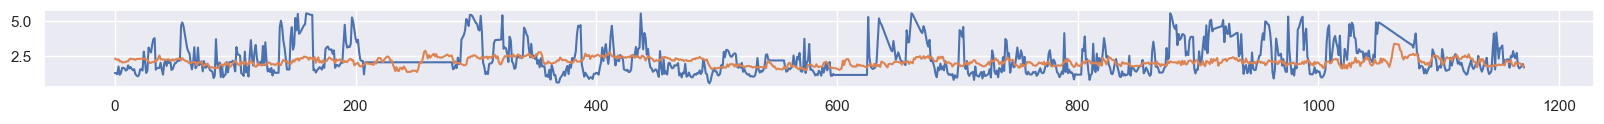

In [47]:
import seaborn as sns
sns.lineplot(data = Y_valid.to_list())
sns.lineplot(data = predicted)
sns.set(rc={'figure.figsize':(20, 1)})

In [30]:
fold_importance_df = pd.DataFrame()
fold_importance_df["feature"] = [i for i in X_train.columns if i != 'N_Fold']
fold_importance_df["importance"] = xgbrModel.feature_importances_
fold_importance_df.sort_values(by="importance",ascending=False)

,feature,importance
108,Flotation Column 03 Air Flow_6,0.027604
88,Flotation Column 03 Air Flow_5,0.025966
106,Flotation Column 01 Air Flow_6,0.021149
28,Flotation Column 03 Air Flow_2,0.020271
68,Flotation Column 03 Air Flow_4,0.018160
...,...,...
35,Flotation Column 03 Level_2,0.005440
38,Flotation Column 06 Level_2,0.005415
110,Flotation Column 05 Air Flow_6,0.005191
18,Flotation Column 06 Level,0.005131
